#  ML_Elastic_ Price_ Optimization

In [22]:
# Import the reqiured libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)

In [23]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [24]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Load the data

In [25]:
sold = pd.read_csv('SellData.csv')
transactions = pd.read_csv('Transaction.csv')
date_info = pd.read_csv('DateInfo.csv')

In [26]:
sold.head()

SELL_ID  SELL_CATEGORY  ITEM_ID ITEM_NAME
0     1070              0     7821    BURGER
1     3055              0     3052    COFFEE
2     3067              0     5030      COKE
3     3028              0     6249  LEMONADE
4     2051              2     7821    BURGER

In [27]:
sold.describe()
sold.describe(include = ['O']) 

SELL_ID  SELL_CATEGORY      ITEM_ID
count    11.000000      11.000000    11.000000
mean   2235.000000       1.272727  5906.909091
std     598.728653       1.009050  1830.217170
min    1070.000000       0.000000  3052.000000
25%    2051.500000       0.000000  5030.000000
50%    2053.000000       2.000000  6249.000000
75%    2540.500000       2.000000  7821.000000
max    3067.000000       2.000000  7821.000000

ITEM_NAME
count         11
unique         4
top       BURGER
freq           4

In [28]:
sold[sold.isnull().any(axis=1)]

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_ID, ITEM_NAME]
Index: []

SELL_ID: a categorical variable, identifier of the combination of items that is contained in the product.

SELL_CATEGORY: “0” identifies single products; the category “2” identifies the combo ones.

ITEM_ID: a categorical variable, identifier of the item that is contained in the product.

ITEM_NAME: a categorical variable, identifying the name of the item

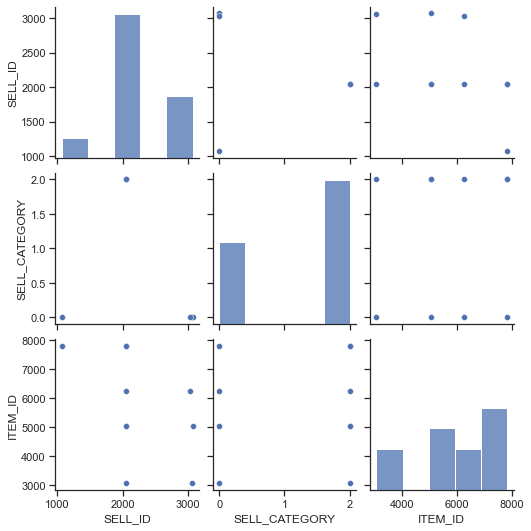

In [29]:
sns.pairplot(sold)

In [30]:
transactions.head()

CALENDAR_DATE  PRICE  QUANTITY  SELL_ID  SELL_CATEGORY
0      1/1/2017  15.50        46     1070              0
1      1/1/2017  12.73        22     2051              2
2      1/1/2017  12.75        18     2052              2
3      1/1/2017  12.60        30     2053              2
4      1/2/2017  15.50        70     1070              0

In [31]:
transactions.describe()
transactions.describe(include = ['O'])

PRICE     QUANTITY     SELL_ID  SELL_CATEGORY
count  5404.000000  5404.000000  5404.00000    5404.000000
mean     12.868729    44.335307  1806.50000       1.500000
std       1.563922    25.502597   425.25841       0.866106
min      10.120000     8.000000  1070.00000       0.000000
25%      11.530000    24.000000  1805.75000       1.500000
50%      12.640000    36.000000  2051.50000       2.000000
75%      13.557500    60.000000  2052.25000       2.000000
max      16.500000   124.000000  2053.00000       2.000000

CALENDAR_DATE
count           5404
unique          1348
top         3/1/2018
freq              16

In [32]:
transactions[transactions.isnull().any(axis=1)]

Empty DataFrame
Columns: [CALENDAR_DATE, PRICE, QUANTITY, SELL_ID, SELL_CATEGORY]
Index: []

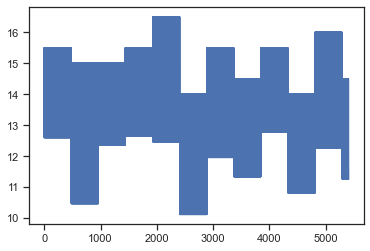

In [33]:
plt.plot(transactions.PRICE)

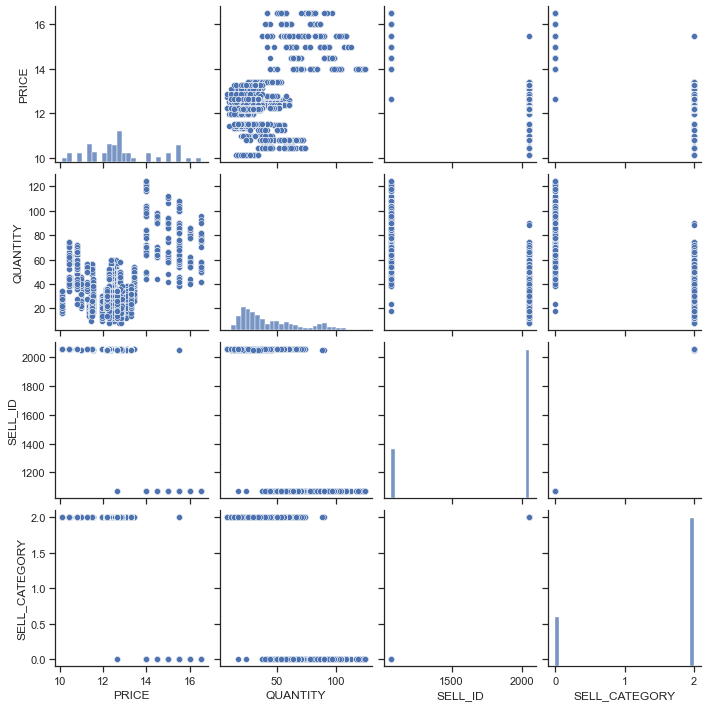

In [34]:
sns.pairplot(transactions)

In [35]:
date_info.head()

CALENDAR_DATE  YEAR   HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
0      1/1/2017  2017  New Year           1               0   
1      1/2/2017  2017  New Year           0               0   
2      1/3/2017  2017  New Year           0               0   
3      1/4/2017  2017       NaN           0               0   
4      1/5/2017  2017       NaN           0               0   

   AVERAGE_TEMPERATURE  IS_OUTDOOR  
0                 24.8           0  
1                 24.8           0  
2                 32.0           1  
3                 32.0           1  
4                 24.8           0

In [36]:
date_info.describe()
date_info.describe(include = ['O'])

YEAR   IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  \
count  1349.000000  1349.000000     1349.000000          1349.000000   
mean   2018.375093     0.285397        0.204596            56.326019   
std       1.073073     0.451771        0.403556            20.227597   
min    2017.000000     0.000000        0.000000            14.000000   
25%    2017.000000     0.000000        0.000000            35.600000   
50%    2018.000000     0.000000        0.000000            60.800000   
75%    2019.000000     1.000000        0.000000            75.200000   
max    2020.000000     1.000000        1.000000            87.800000   

        IS_OUTDOOR  
count  1349.000000  
mean      0.862120  
std       0.344902  
min       0.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       1.000000

CALENDAR_DATE         HOLIDAY
count           1349             105
unique          1348               8
top         3/1/2018  Luner New Year
freq               2              28

In [37]:
date_info.dtypes

CALENDAR_DATE           object
YEAR                     int64
HOLIDAY                 object
IS_WEEKEND               int64
IS_SCHOOLBREAK           int64
AVERAGE_TEMPERATURE    float64
IS_OUTDOOR               int64
dtype: object

In [38]:
date_info[date_info.isnull().any(axis=1)]

CALENDAR_DATE  YEAR HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
3         1/4/2017  2017     NaN           0               0   
4         1/5/2017  2017     NaN           0               0   
5         1/6/2017  2017     NaN           0               0   
6         1/7/2017  2017     NaN           1               0   
7         1/8/2017  2017     NaN           1               0   
8         1/9/2017  2017     NaN           0               0   
9        1/10/2017  2017     NaN           0               0   
10       1/11/2017  2017     NaN           0               0   
11       1/12/2017  2017     NaN           0               0   
12       1/13/2017  2017     NaN           0               0   
13       1/14/2017  2017     NaN           1               0   
14       1/15/2017  2017     NaN           1               0   
15       1/16/2017  2017     NaN           0               0   
16       1/17/2017  2017     NaN           0               0   
17       1/18/2017  2017     NaN           0               0   
18       1/19/2017  2017     NaN           0               0   
19       1/20/2017  2017     NaN           0               0   
20       1/21/2017  2017     NaN           1               0   
21       1/22/2017  2017     NaN           1               0   
22       1/23/2017  2017     NaN           0               0   
23       1/24/2017  2017     NaN           0               0   
24       1/25/2017  2017     NaN           0               0   
25       1/26/2017  2017     NaN           0               0   
26       1/27/2017  2017     NaN           0               0   
27       1/28/2017  2017     NaN           1               0   
28       1/29/2017  2017     NaN           1               0   
29       1/30/2017  2017     NaN           0               0   
30       1/31/2017  2017     NaN           0               0   
31        2/1/2017  2017     NaN           0               0   
39        2/9/2017  2017     NaN           0               0   
40       2/10/2017  2017     NaN           0               0   
41       2/11/2017  2017     NaN           1               0   
42       2/12/2017  2017     NaN           1               0   
43       2/13/2017  2017     NaN           0               0   
44       2/14/2017  2017     NaN           0               0   
45       2/15/2017  2017     NaN           0               0   
46       2/16/2017  2017     NaN           0               0   
47       2/17/2017  2017     NaN           0               0   
48       2/18/2017  2017     NaN           1               0   
49       2/19/2017  2017     NaN           1               0   
50       2/20/2017  2017     NaN           0               0   
51       2/21/2017  2017     NaN           0               0   
52       2/22/2017  2017     NaN           0               0   
53       2/23/2017  2017     NaN           0               0   
54       2/24/2017  2017     NaN           0               0   
55       2/25/2017  2017     NaN           1               0   
56       2/26/2017  2017     NaN           1               0   
57       2/27/2017  2017     NaN           0               0   
58       2/28/2017  2017     NaN           0               0   
59        3/1/2017  2017     NaN           0               0   
60        3/2/2017  2017     NaN           0               0   
61        3/3/2017  2017     NaN           1               0   
62        3/4/2017  2017     NaN           1               0   
63        3/5/2017  2017     NaN           0               0   
64        3/6/2017  2017     NaN           0               0   
65        3/7/2017  2017     NaN           0               0   
66        3/8/2017  2017     NaN           0               0   
67        3/9/2017  2017     NaN           0               0   
68       3/10/2017  2017     NaN           1               0   
69       3/11/2017  2017     NaN           1               0   
70       3/12/2017  2017     NaN           0               0   
71       3/13/2017  2017     NaN     

In [39]:
date_info['HOLIDAY'] = date_info['HOLIDAY'].fillna("No Holiday")

In [40]:
date_info

CALENDAR_DATE  YEAR               HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  \
0         1/1/2017  2017              New Year           1               0   
1         1/2/2017  2017              New Year           0               0   
2         1/3/2017  2017              New Year           0               0   
3         1/4/2017  2017            No Holiday           0               0   
4         1/5/2017  2017            No Holiday           0               0   
5         1/6/2017  2017            No Holiday           0               0   
6         1/7/2017  2017            No Holiday           1               0   
7         1/8/2017  2017            No Holiday           1               0   
8         1/9/2017  2017            No Holiday           0               0   
9        1/10/2017  2017            No Holiday           0               0   
10       1/11/2017  2017            No Holiday           0               0   
11       1/12/2017  2017            No Holiday           0               0   
12       1/13/2017  2017            No Holiday           0               0   
13       1/14/2017  2017            No Holiday           1               0   
14       1/15/2017  2017            No Holiday           1               0   
15       1/16/2017  2017            No Holiday           0               0   
16       1/17/2017  2017            No Holiday           0               0   
17       1/18/2017  2017            No Holiday           0               0   
18       1/19/2017  2017            No Holiday           0               0   
19       1/20/2017  2017            No Holiday           0               0   
20       1/21/2017  2017            No Holiday           1               0   
21       1/22/2017  2017            No Holiday           1               0   
22       1/23/2017  2017            No Holiday           0               0   
23       1/24/2017  2017            No Holiday           0               0   
24       1/25/2017  2017            No Holiday           0               0   
25       1/26/2017  2017            No Holiday           0               0   
26       1/27/2017  2017            No Holiday           0               0   
27       1/28/2017  2017            No Holiday           1               0   
28       1/29/2017  2017            No Holiday           1               0   
29       1/30/2017  2017            No Holiday           0               0   
30       1/31/2017  2017            No Holiday           0               0   
31        2/1/2017  2017            No Holiday           0               0   
32        2/2/2017  2017        Luner New Year           0               0   
33        2/3/2017  2017        Luner New Year           0               0   
34        2/4/2017  2017        Luner New Year           1               0   
35        2/5/2017  2017        Luner New Year           1               0   
36        2/6/2017  2017        Luner New Year           0               0   
37        2/7/2017  2017        Luner New Year           0               0   
38        2/8/2017  2017        Luner New Year           0               0   
39        2/9/2017  2017            No Holiday           0               0   
40       2/10/2017  2017            No Holiday           0               0   
41       2/11/2017  2017            No Holiday           1               0   
42       2/12/2017  2017            No Holiday           1               0   
43       2/13/2017  2017            No Holiday           0               0   
44       2/14/2017  2017            No Holiday           0               0   
45       2/15/2017  2017            No Holiday           0               0   
46       2/16/2017  2017            No Holiday           0               0   
47       2/17/2017  2017            No Holiday           0               0   
48       2/18/2017  2017            No Holiday           1               0   
49       2/19/2017  2017            No Holiday           1               0   
50       2/20/2017  2017   

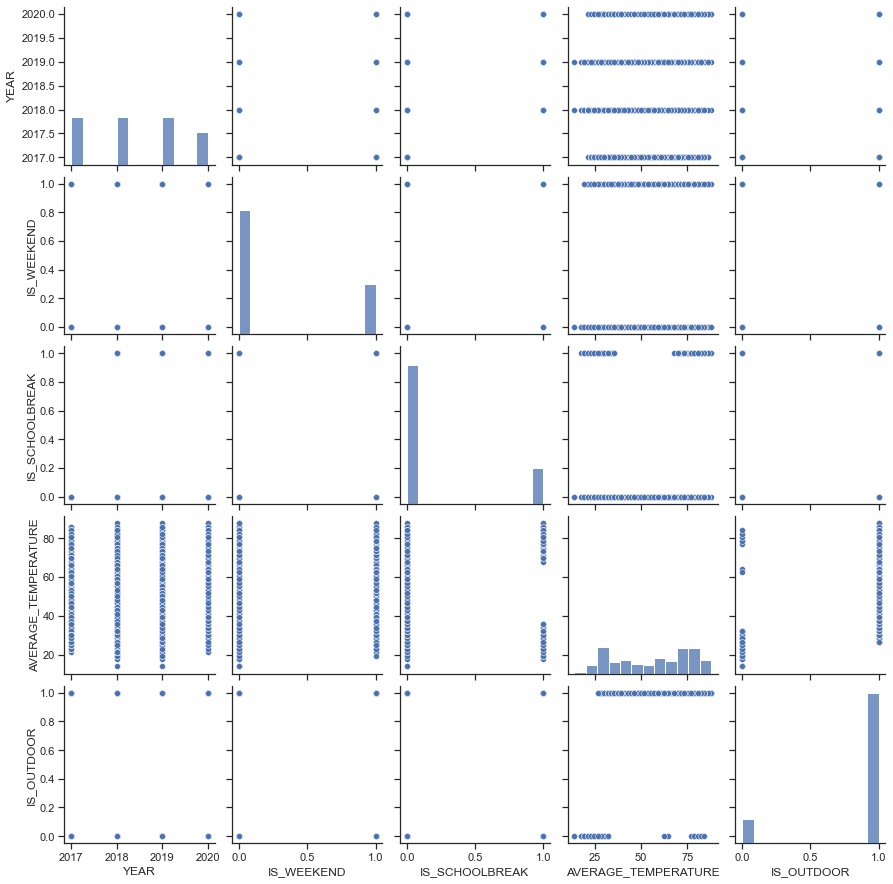

In [41]:
sns.pairplot(date_info)

# Understanding the data better

In [42]:
np.unique(date_info['HOLIDAY'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

In [43]:
date_info['CALENDAR_DATE'].min()

'1/1/2017'

In [44]:
date_info['CALENDAR_DATE'].max()

'9/9/2020'

In [45]:
date_info.shape

(1349, 7)

In [46]:
date_info[date_info.isnull().any(axis=1)]

Empty DataFrame
Columns: [CALENDAR_DATE, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR]
Index: []

In [47]:
# ------------------------------------------------------------------------------------------------------

In [48]:
pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1)

SELL_ID  BURGER  COFFEE  COKE  LEMONADE
0      1070       1       0     0         0
1      3055       0       1     0         0
2      3067       0       0     1         0
3      3028       0       0     0         1
4      2051       1       0     0         0
5      2051       0       0     1         0
6      2052       1       0     0         0
7      2052       0       0     0         1
8      2053       1       0     0         0
9      2053       0       0     1         0
10     2053       0       1     0         0

In [49]:

pd.concat([sold.SELL_ID, pd.get_dummies(sold.ITEM_NAME)], axis=1).groupby(sold.SELL_ID).sum()

SELL_ID  BURGER  COFFEE  COKE  LEMONADE
SELL_ID                                         
1070        1070       1       0     0         0
2051        4102       1       0     1         0
2052        4104       1       0     0         1
2053        6159       1       1     1         0
3028        3028       0       0     0         1
3055        3055       0       1     0         0
3067        3067       0       0     1         0

In [50]:
data1 = pd.merge(sold.drop(['ITEM_ID'],axis=1), transactions.drop(['SELL_CATEGORY'], axis= 1), on =  'SELL_ID')
data1.head(20)
b = data1.groupby(['SELL_ID', 'SELL_CATEGORY', 'ITEM_NAME', 'CALENDAR_DATE','PRICE']).QUANTITY.sum()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY
0      1070              0    BURGER      1/1/2017   15.5        46
1      1070              0    BURGER      1/2/2017   15.5        70
2      1070              0    BURGER      1/3/2017   15.5        62
3      1070              0    BURGER      1/4/2017   15.5        88
4      1070              0    BURGER      1/5/2017   15.5       104
5      1070              0    BURGER      1/6/2017   15.5       100
6      1070              0    BURGER      1/7/2017   15.5        70
7      1070              0    BURGER      1/8/2017   15.5        70
8      1070              0    BURGER      1/9/2017   15.5       106
9      1070              0    BURGER     1/10/2017   15.5       108
10     1070              0    BURGER     1/11/2017   15.5       104
11     1070              0    BURGER     1/12/2017   15.5       102
12     1070              0    BURGER     1/13/2017   15.5       100
13     1070              0    BURGER     1/14/2017   15.5        74
14     1070              0    BURGER     1/15/2017   15.5        60
15     1070              0    BURGER     1/16/2017   15.5       104
16     1070              0    BURGER     1/17/2017   15.5       106
17     1070              0    BURGER     1/18/2017   15.5       108
18     1070              0    BURGER     1/19/2017   15.5       100
19     1070              0    BURGER     1/20/2017   15.5       100

In [51]:
b

SELL_ID  SELL_CATEGORY  ITEM_NAME  CALENDAR_DATE  PRICE
1070     0              BURGER     1/1/2017       15.50     46
                                   1/1/2018       15.50     60
                                   1/1/2019       15.50     72
                                   1/1/2020       14.00     66
                                   1/10/2017      15.50    108
                                   1/10/2018      15.50    104
                                   1/10/2019      15.50    102
                                   1/10/2020      14.00     80
                                   1/11/2017      15.50    104
                                   1/11/2018      15.50    102
                                   1/11/2019      15.50     76
                                   1/11/2020      14.00     72
                                   1/12/2017      15.50    102
                                   1/12/2018      15.50     74
                                   1/12/2019      15.50     76

In [52]:
data1.shape
intermediate_data = b.reset_index()

(10808, 6)

In [53]:
data1.shape

(10808, 6)

In [54]:
b.shape

(10792,)

In [55]:
intermediate_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY
0     1070              0    BURGER      1/1/2017   15.5        46
1     1070              0    BURGER      1/1/2018   15.5        60
2     1070              0    BURGER      1/1/2019   15.5        72
3     1070              0    BURGER      1/1/2020   14.0        66
4     1070              0    BURGER     1/10/2017   15.5       108

In [56]:
intermediate_data['CALENDAR_DATE'].min()

'1/1/2017'

In [57]:
intermediate_data['CALENDAR_DATE'].max()

'9/9/2020'

In [58]:
combined_data = pd.merge(intermediate_data, date_info, on = 'CALENDAR_DATE')
combined_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER      1/1/2017  15.50        46  2017   
1     2051              2    BURGER      1/1/2017  12.73        22  2017   
2     2051              2      COKE      1/1/2017  12.73        22  2017   
3     2052              2    BURGER      1/1/2017  12.75        18  2017   
4     2052              2  LEMONADE      1/1/2017  12.75        18  2017   

    HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  New Year           1               0                 24.8           0  
1  New Year           1               0                 24.8           0  
2  New Year           1               0                 24.8           0  
3  New Year           1               0                 24.8           0  
4  New Year           1               0                 24.8           0

In [59]:
combined_data.shape

(10808, 12)

In [60]:
combined_data[combined_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_NAME, CALENDAR_DATE, PRICE, QUANTITY, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR]
Index: []

In [61]:
np.unique(combined_data['HOLIDAY'])
np.unique(combined_data['IS_WEEKEND'])
np.unique(combined_data['IS_SCHOOLBREAK'])

array(['Dragon Boat Festivel', 'Labor Day', 'Luner New Year',
       'Mid-Autumn Day', 'National Day', 'New Year', 'No Holiday',
       'Qing Ming Festival', 'WWII Celebration'], dtype=object)

array([0, 1], dtype=int64)

array([0, 1], dtype=int64)

In [62]:
bau_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0)]

In [63]:
bau_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
32     1070              0    BURGER     1/10/2017  15.50       108  2017   
33     2051              2    BURGER     1/10/2017  12.73        40  2017   
34     2051              2      COKE     1/10/2017  12.73        40  2017   
35     2052              2    BURGER     1/10/2017  12.75        28  2017   
36     2052              2  LEMONADE     1/10/2017  12.75        28  2017   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
32  No Holiday           0               0                 24.8           0  
33  No Holiday           0               0                 24.8           0  
34  No Holiday           0               0                 24.8           0  
35  No Holiday           0               0                 24.8           0  
36  No Holiday           0               0                 24.8           0

In [64]:
bau_data.shape

(5664, 12)

In [65]:
np.unique(bau_data['HOLIDAY'])
np.unique(bau_data['IS_WEEKEND'])
np.unique(bau_data['IS_SCHOOLBREAK'])

array(['No Holiday'], dtype=object)

array([0], dtype=int64)

array([0], dtype=int64)

In [66]:
bau_data[bau_data['IS_WEEKEND']==1]

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_NAME, CALENDAR_DATE, PRICE, QUANTITY, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR]
Index: []

In [67]:
bau_data[bau_data['HOLIDAY']!='No Holiday']

Empty DataFrame
Columns: [SELL_ID, SELL_CATEGORY, ITEM_NAME, CALENDAR_DATE, PRICE, QUANTITY, YEAR, HOLIDAY, IS_WEEKEND, IS_SCHOOLBREAK, AVERAGE_TEMPERATURE, IS_OUTDOOR]
Index: []

(array([2832.,    0.,    0., 1416.,    0.,    0.,  708.,    0.,    0.,
         708.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

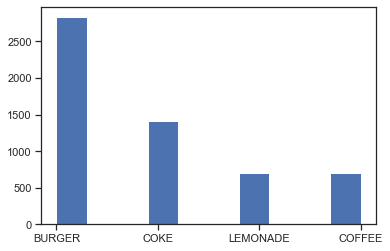

In [68]:
# Data exploration
plt.hist(bau_data.ITEM_NAME)

(array([ 613.,  602.,  680., 1659., 1210.,  190.,  186.,  159.,  273.,
          92.]),
 array([10.12 , 10.758, 11.396, 12.034, 12.672, 13.31 , 13.948, 14.586,
        15.224, 15.862, 16.5  ]),
 <BarContainer object of 10 artists>)

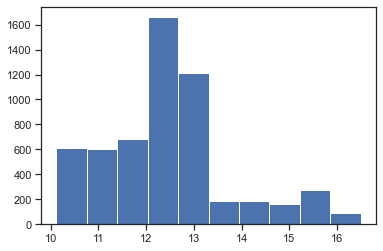

In [69]:
plt.hist(bau_data.PRICE)

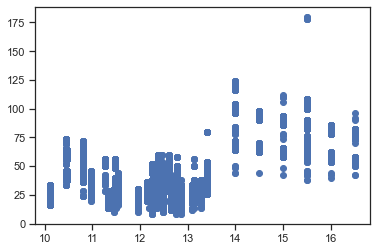

In [70]:
plt.scatter(combined_data['PRICE'], combined_data['QUANTITY'])

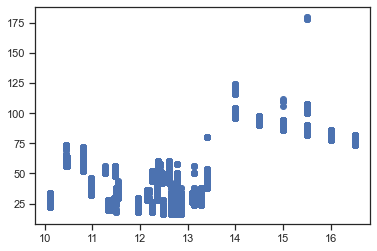

In [71]:
plt.scatter(bau_data['PRICE'], bau_data['QUANTITY'])

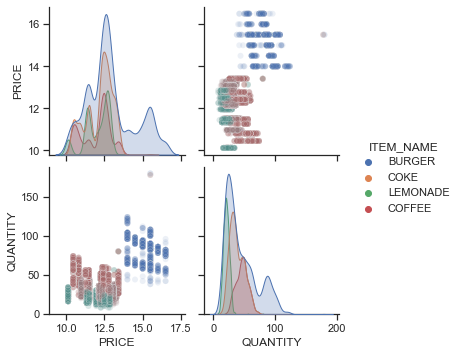

In [72]:
sns.pairplot(combined_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

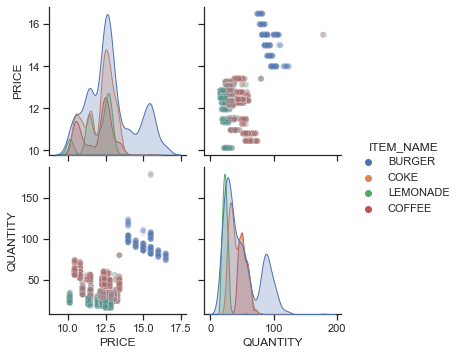

In [73]:
sns.pairplot(bau_data[['PRICE','QUANTITY','ITEM_NAME']], hue = 'ITEM_NAME', plot_kws={'alpha':0.1})

The price density plot is bimodal. From the graph we can see that for all quantities, as the price is increased the quantity sold is decreased. Although coke is hidden in this view. We xan go ahead and calculate the price elasticities for this.

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0     1070              0    BURGER      1/1/2017  15.50        46  2017   
1     2051              2    BURGER      1/1/2017  12.73        22  2017   
3     2052              2    BURGER      1/1/2017  12.75        18  2017   
5     2053              2    BURGER      1/1/2017  12.60        30  2017   
8     1070              0    BURGER      1/1/2018  15.50        60  2018   

    HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0  New Year           1               0                 24.8           0  
1  New Year           1               0                 24.8           0  
3  New Year           1               0                 24.8           0  
5  New Year           1               0                 24.8           0  
8  New Year           0               0                 30.2           1

(5404, 12)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  5404.00000    5404.000000  5404.000000  5404.000000  5404.000000   
mean   1806.50000       1.500000    12.868729    44.465581  2018.374537   
std     425.25841       0.866106     1.563922    25.741078     1.072077   
min    1070.00000       0.000000    10.120000     8.000000  2017.000000   
25%    1805.75000       1.500000    11.530000    24.000000  2017.000000   
50%    2051.50000       2.000000    12.640000    36.000000  2018.000000   
75%    2052.25000       2.000000    13.557500    60.000000  2019.000000   
max    2053.00000       2.000000    16.500000   180.000000  2020.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  5404.000000     5404.000000          5404.000000  5404.000000  
mean      0.284974        0.204293            56.295337     0.862324  
std       0.451444        0.403221            20.223179     0.344591  
min       0.000000        0.000000            14.000000     0.000000  
25%       0.000000        0.000000            35.600000     1.000000  
50%       0.000000        0.000000            60.800000     1.000000  
75%       1.000000        0.000000            75.200000     1.000000  
max       1.000000        1.000000            87.800000     1.000000

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

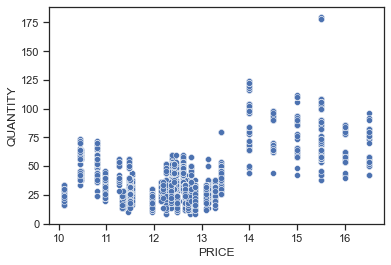

In [74]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
burger.head()
burger.shape
burger.describe()
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

From the above scatter plot it is clearly visible that there must be different types of burgers being sold. Now let's see the same distributin whenwe differentiate with SELL_ID which indicates if the burger was a part of the combo and hence, must be treated separately.

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

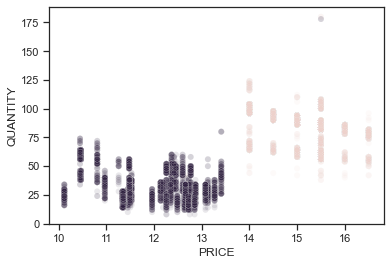

In [75]:
burger = combined_data[combined_data['ITEM_NAME'] == 'BURGER']
# print(burger)
# print(burger.describe())
sns.scatterplot(data = burger, x = burger.PRICE, y = burger.QUANTITY , hue = 'SELL_ID', legend=False, alpha = 0.1)

In [76]:
np.unique(combined_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [77]:
np.unique(combined_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
0      1070              0    BURGER      1/1/2017   15.5        46  2017   
8      1070              0    BURGER      1/1/2018   15.5        60  2018   
16     1070              0    BURGER      1/1/2019   15.5        72  2019   
24     1070              0    BURGER      1/1/2020   14.0        66  2020   
32     1070              0    BURGER     1/10/2017   15.5       108  2017   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
0     New Year           1               0                 24.8           0  
8     New Year           0               0                 30.2           1  
16    New Year           0               0                 19.4           0  
24    New Year           0               0                 37.4           1  
32  No Holiday           0               0                 24.8           0

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count   1351.0         1351.0  1351.000000  1351.000000  1351.000000   
mean    1070.0            0.0    15.163420    81.560326  2018.374537   
std        0.0            0.0     0.751448    16.880733     1.072375   
min     1070.0            0.0    12.640000    38.000000  2017.000000   
25%     1070.0            0.0    14.500000    66.000000  2017.000000   
50%     1070.0            0.0    15.500000    84.000000  2018.000000   
75%     1070.0            0.0    15.500000    92.000000  2019.000000   
max     1070.0            0.0    16.500000   180.000000  2020.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  1351.000000     1351.000000          1351.000000  1351.000000  
mean      0.284974        0.204293            56.295337     0.862324  
std       0.451569        0.403333            20.228796     0.344687  
min       0.000000        0.000000            14.000000     0.000000  
25%       0.000000        0.000000            35.600000     1.000000  
50%       0.000000        0.000000            60.800000     1.000000  
75%       1.000000        0.000000            75.200000     1.000000  
max       1.000000        1.000000            87.800000     1.000000

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

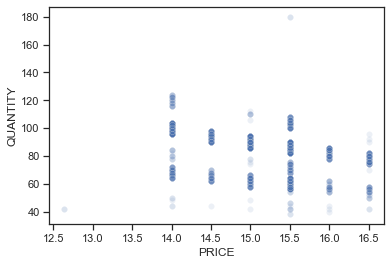

In [78]:
burger_1070 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

# Modeling

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     154.5
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.18e-33
Time:                        10:04:19   Log-Likelihood:                -5661.4
No. Observations:                1351   AIC:                         1.133e+04
Df Residuals:                    1349   BIC:                         1.134e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    190.7469      8.796     21.686      0.0

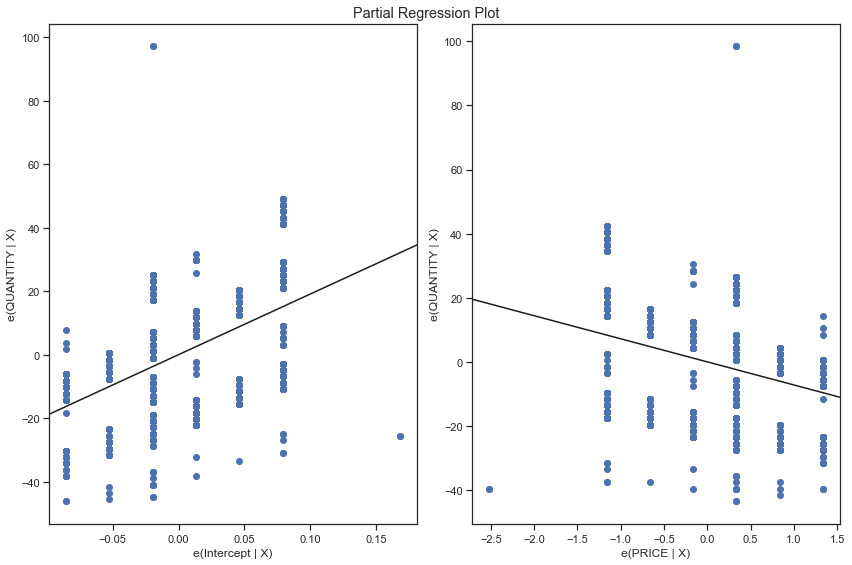

In [79]:
# This is for the combined data
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

In [146]:
burger = bau_data[bau_data['ITEM_NAME'] == 'BURGER']
burger.head()


SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
32     1070              0    BURGER     1/10/2017  15.50       108  2017   
33     2051              2    BURGER     1/10/2017  12.73        40  2017   
35     2052              2    BURGER     1/10/2017  12.75        28  2017   
37     2053              2    BURGER     1/10/2017  12.60        58  2017   
40     1070              0    BURGER     1/10/2018  15.50       104  2018   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
32  No Holiday           0               0                 24.8           0  
33  No Holiday           0               0                 24.8           0  
35  No Holiday           0               0                 24.8           0  
37  No Holiday           0               0                 24.8           0  
40  No Holiday           0               0                 28.4           0

In [147]:
burger.shape


(2832, 12)

In [148]:
burger.describe()

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  2832.000000    2832.000000  2832.000000  2832.000000  2832.000000   
mean   1806.500000       1.500000    12.833347    49.759887  2018.223164   
std     425.294155       0.866178     1.567778    27.679683     1.067645   
min    1070.000000       0.000000    10.120000    16.000000  2017.000000   
25%    1805.750000       1.500000    11.530000    28.000000  2017.000000   
50%    2051.500000       2.000000    12.640000    42.000000  2018.000000   
75%    2052.250000       2.000000    13.557500    74.000000  2019.000000   
max    2053.000000       2.000000    16.500000   180.000000  2020.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count      2832.0          2832.0          2832.000000  2832.000000  
mean          0.0             0.0            53.963559     0.879944  
std           0.0             0.0            18.813899     0.325085  
min           0.0             0.0            14.000000     0.000000  
25%           0.0             0.0            36.950000     1.000000  
50%           0.0             0.0            54.500000     1.000000  
75%           0.0             0.0            71.600000     1.000000  
max           0.0             0.0            87.800000     1.000000

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

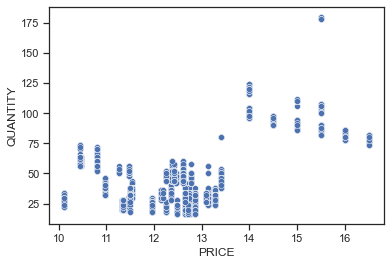

In [149]:
sns.scatterplot(x = burger.PRICE, y = burger.QUANTITY )

<AxesSubplot:>

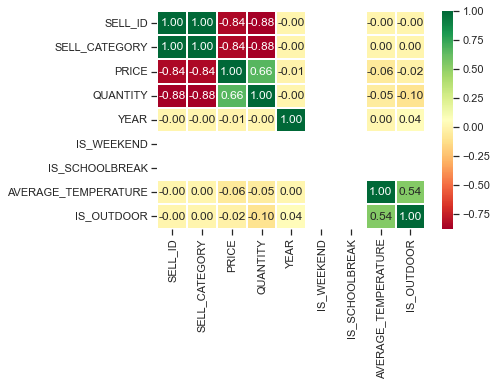

In [150]:
corr= burger.corr()
sns.heatmap(burger.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="RdYlGn")
plt.show()

In [83]:
np.unique(bau_data.SELL_ID)

array([1070, 2051, 2052, 2053], dtype=int64)

In [84]:
np.unique(bau_data.SELL_CATEGORY)

array([0, 2], dtype=int64)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
32     1070              0    BURGER     1/10/2017   15.5       108  2017   
40     1070              0    BURGER     1/10/2018   15.5       104  2018   
48     1070              0    BURGER     1/10/2019   15.5       102  2019   
64     1070              0    BURGER     1/11/2017   15.5       104  2017   
72     1070              0    BURGER     1/11/2018   15.5       102  2018   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
32  No Holiday           0               0                 24.8           0  
40  No Holiday           0               0                 28.4           0  
48  No Holiday           0               0                 24.8           0  
64  No Holiday           0               0                 21.2           0  
72  No Holiday           0               0                 24.8           0

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    708.0          708.0  708.000000  708.000000   708.000000   
mean    1070.0            0.0   15.115508   91.742938  2018.223164   
std        0.0            0.0    0.715501   10.795070     1.068211   
min     1070.0            0.0   12.640000   42.000000  2017.000000   
25%     1070.0            0.0   14.500000   86.000000  2017.000000   
50%     1070.0            0.0   15.500000   90.000000  2018.000000   
75%     1070.0            0.0   15.500000   98.000000  2019.000000   
max     1070.0            0.0   16.500000  180.000000  2020.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
count       708.0           708.0           708.000000  708.000000  
mean          0.0             0.0            53.963559    0.879944  
std           0.0             0.0            18.823876    0.325257  
min           0.0             0.0            14.000000    0.000000  
25%           0.0             0.0            36.950000    1.000000  
50%           0.0             0.0            54.500000    1.000000  
75%           0.0             0.0            71.600000    1.000000  
max           0.0             0.0            87.800000    1.000000

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

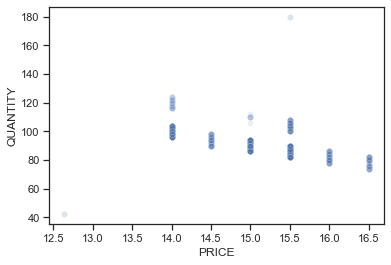

In [85]:
burger_1070 = bau_data[(bau_data['ITEM_NAME'] == 'BURGER') & (bau_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

As you can see, the scatter plot is much cleaner. Although there does seem to be 2 separate trends

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     352.6
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.21e-62
Time:                        10:53:14   Log-Likelihood:                -2109.2
No. Observations:                 623   AIC:                             4222.
Df Residuals:                     621   BIC:                             4231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    202.1935      6.012     33.633      0.0

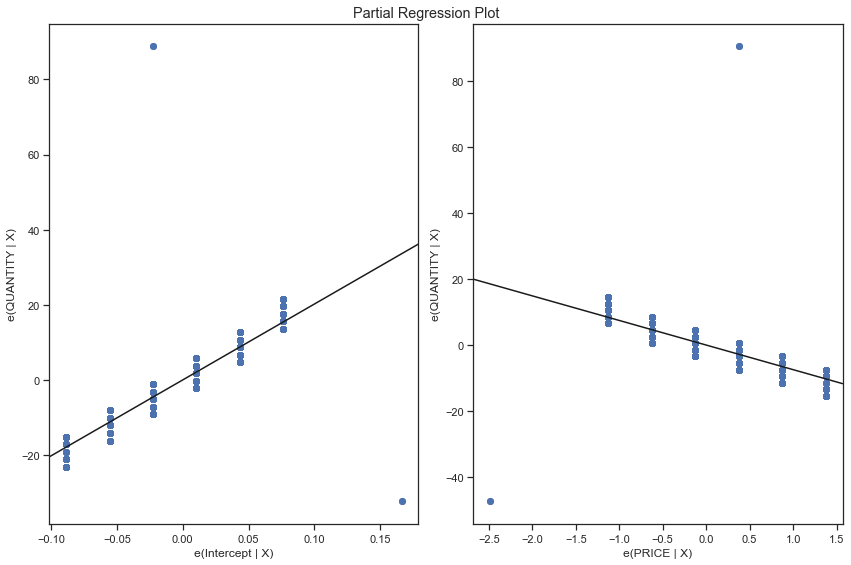

In [151]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

Let's look at the bau data again to see if there is anything els ein the data we can use to further refine our model.

In [152]:
bau_data.head()

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
32     1070              0    BURGER     1/10/2017  15.50       108  2017   
33     2051              2    BURGER     1/10/2017  12.73        40  2017   
34     2051              2      COKE     1/10/2017  12.73        40  2017   
35     2052              2    BURGER     1/10/2017  12.75        28  2017   
36     2052              2  LEMONADE     1/10/2017  12.75        28  2017   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
32  No Holiday           0               0                 24.8           0  
33  No Holiday           0               0                 24.8           0  
34  No Holiday           0               0                 24.8           0  
35  No Holiday           0               0                 24.8           0  
36  No Holiday           0               0                 24.8           0

In [153]:
bau2_data = combined_data[(combined_data['HOLIDAY']=='No Holiday') & (combined_data['IS_SCHOOLBREAK']==0) & (combined_data['IS_WEEKEND']==0) & (combined_data['IS_OUTDOOR']==1)]

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
176     1070              0    BURGER     1/14/2019   15.5        86  2019   
216     1070              0    BURGER     1/15/2020   14.0       104  2020   
248     1070              0    BURGER     1/16/2020   14.0       100  2020   
376     1070              0    BURGER      1/2/2020   14.0       102  2020   
608     1070              0    BURGER     1/27/2017   15.5        86  2017   

        HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
176  No Holiday           0               0                 28.4           1  
216  No Holiday           0               0                 32.0           1  
248  No Holiday           0               0                 32.0           1  
376  No Holiday           0               0                 37.4           1  
608  No Holiday           0               0                 32.0           1

SELL_ID  SELL_CATEGORY       PRICE    QUANTITY         YEAR  \
count    623.0          623.0  623.000000  623.000000   623.000000   
mean    1070.0            0.0   15.124045   89.431782  2018.239165   
std        0.0            0.0    0.722906    8.956024     1.087317   
min     1070.0            0.0   12.640000   42.000000  2017.000000   
25%     1070.0            0.0   14.500000   84.000000  2017.000000   
50%     1070.0            0.0   15.000000   88.000000  2018.000000   
75%     1070.0            0.0   15.500000   94.000000  2019.000000   
max     1070.0            0.0   16.500000  180.000000  2020.000000   

       IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
count       623.0           623.0            623.00000       623.0  
mean          0.0             0.0             57.69695         1.0  
std           0.0             0.0             16.81881         0.0  
min           0.0             0.0             26.60000         1.0  
25%           0.0             0.0             41.00000         1.0  
50%           0.0             0.0             59.00000         1.0  
75%           0.0             0.0             73.40000         1.0  
max           0.0             0.0             87.80000         1.0

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

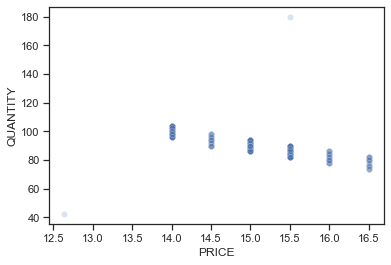

In [154]:
burger_1070 = bau2_data[(bau2_data['ITEM_NAME'] == 'BURGER') & (bau2_data['SELL_ID'] == 1070)]

burger_1070.head()
burger_1070.describe()
sns.scatterplot(data = burger_1070, x = burger_1070.PRICE, y = burger_1070.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     352.6
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.21e-62
Time:                        10:53:18   Log-Likelihood:                -2109.2
No. Observations:                 623   AIC:                             4222.
Df Residuals:                     621   BIC:                             4231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    202.1935      6.012     33.633      0.0

<Figure size 864x576 with 0 Axes>

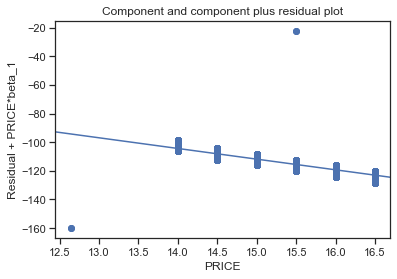

In [155]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_1070).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_ccpr(burger_model, "PRICE")

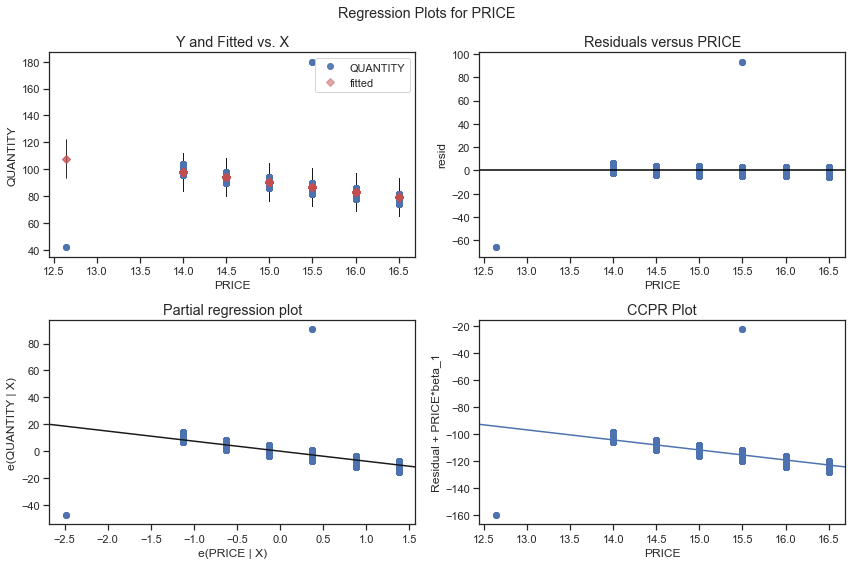

In [156]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(burger_model, "PRICE", fig=fig)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
1      2051              2    BURGER      1/1/2017  12.73        22  2017   
9      2051              2    BURGER      1/1/2018  13.13        22  2018   
17     2051              2    BURGER      1/1/2019  13.27        22  2019   
25     2051              2    BURGER      1/1/2020  11.53        24  2020   
33     2051              2    BURGER     1/10/2017  12.73        40  2017   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
1     New Year           1               0                 24.8           0  
9     New Year           0               0                 30.2           1  
17    New Year           0               0                 19.4           0  
25    New Year           0               0                 37.4           1  
33  No Holiday           0               0                 24.8           0

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count   1351.0         1351.0  1351.000000  1351.000000  1351.000000   
mean    2051.0            2.0    12.383368    29.304219  2018.374537   
std        0.0            0.0     0.730868     8.200902     1.072375   
min     2051.0            2.0    10.970000    12.000000  2017.000000   
25%     2051.0            2.0    11.530000    24.000000  2017.000000   
50%     2051.0            2.0    12.660000    30.000000  2018.000000   
75%     2051.0            2.0    13.080000    34.000000  2019.000000   
max     2051.0            2.0    15.500000   178.000000  2020.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  1351.000000     1351.000000          1351.000000  1351.000000  
mean      0.284974        0.204293            56.295337     0.862324  
std       0.451569        0.403333            20.228796     0.344687  
min       0.000000        0.000000            14.000000     0.000000  
25%       0.000000        0.000000            35.600000     1.000000  
50%       0.000000        0.000000            60.800000     1.000000  
75%       1.000000        0.000000            75.200000     1.000000  
max       1.000000        1.000000            87.800000     1.000000

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

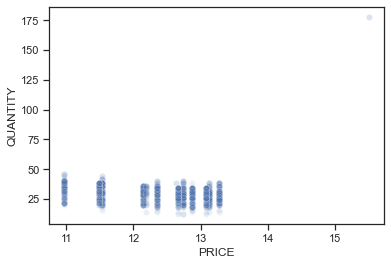

In [157]:
burger_2051 = combined_data[(combined_data['ITEM_NAME'] == 'BURGER') & (combined_data['SELL_ID'] == 2051)]

burger_2051.head()
burger_2051.describe()
sns.scatterplot(data = burger_2051, x = burger_2051.PRICE, y = burger_2051.QUANTITY, alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     16.69
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           4.65e-05
Time:                        10:53:21   Log-Likelihood:                -4751.0
No. Observations:                1351   AIC:                             9506.
Df Residuals:                    1349   BIC:                             9516.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     44.6664      3.767     11.859      0.0

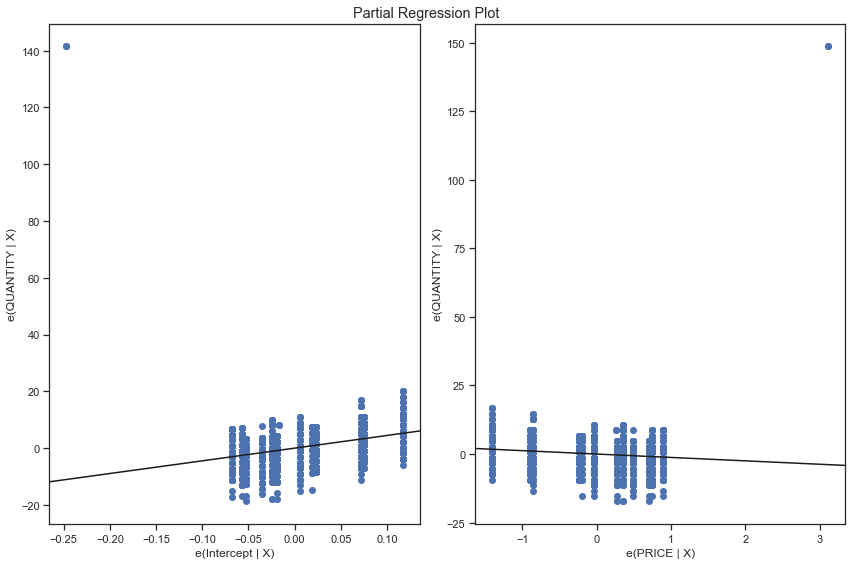

In [158]:
burger_model = ols("QUANTITY ~ PRICE", data=burger_2051).fit()
print(burger_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(burger_model, fig=fig)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
2      2051              2      COKE      1/1/2017  12.73        22  2017   
7      2053              2      COKE      1/1/2017  12.60        30  2017   
10     2051              2      COKE      1/1/2018  13.13        22  2018   
15     2053              2      COKE      1/1/2018  13.41        30  2018   
18     2051              2      COKE      1/1/2019  13.27        22  2019   

     HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
2   New Year           1               0                 24.8           0  
7   New Year           1               0                 24.8           0  
10  New Year           0               0                 30.2           1  
15  New Year           0               0                 30.2           1  
18  New Year           0               0                 19.4           0

(2702, 12)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count  2702.000000         2702.0  2702.000000  2702.000000  2702.000000   
mean   2052.000000            2.0    12.162372    37.754996  2018.374537   
std       1.000185            0.0     0.873843    12.481661     1.072177   
min    2051.000000            2.0    10.450000    12.000000  2017.000000   
25%    2051.000000            2.0    11.490000    28.000000  2017.000000   
50%    2052.000000            2.0    12.370000    36.000000  2018.000000   
75%    2053.000000            2.0    12.770000    46.000000  2019.000000   
max    2053.000000            2.0    15.500000   178.000000  2020.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  2702.000000     2702.000000          2702.000000  2702.000000  
mean      0.284974        0.204293            56.295337     0.862324  
std       0.451486        0.403259            20.225051     0.344623  
min       0.000000        0.000000            14.000000     0.000000  
25%       0.000000        0.000000            35.600000     1.000000  
50%       0.000000        0.000000            60.800000     1.000000  
75%       1.000000        0.000000            75.200000     1.000000  
max       1.000000        1.000000            87.800000     1.000000

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

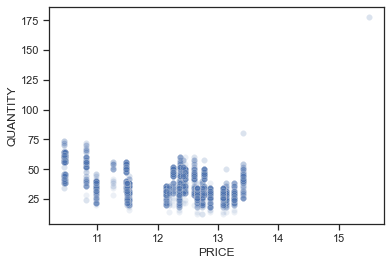

In [159]:
coke = combined_data[combined_data['ITEM_NAME'] == 'COKE']
coke.head()
coke.shape
coke.describe()
sns.scatterplot(x = coke.PRICE, y = coke.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.169
Method:                 Least Squares   F-statistic:                     551.1
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          4.61e-111
Time:                        10:53:24   Log-Likelihood:                -10403.
No. Observations:                2702   AIC:                         2.081e+04
Df Residuals:                    2700   BIC:                         2.082e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    109.2821      3.055     35.776      0.0

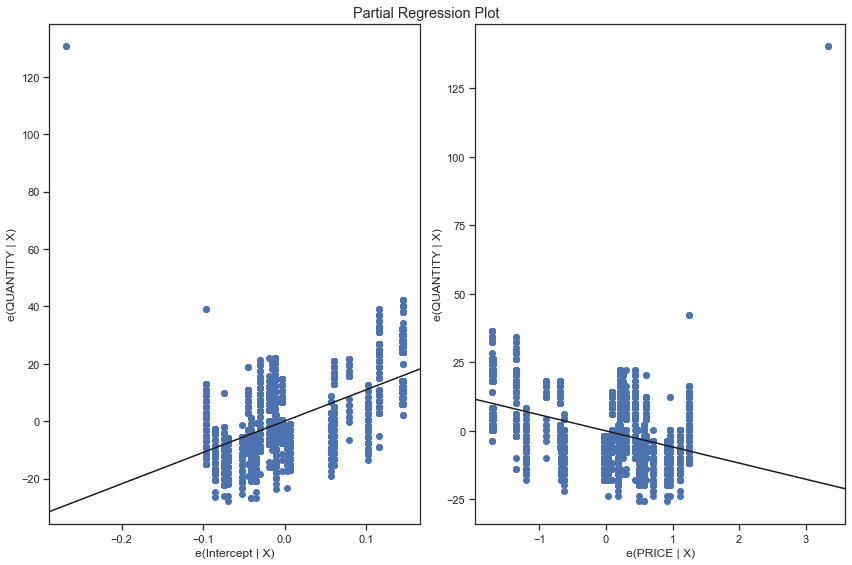

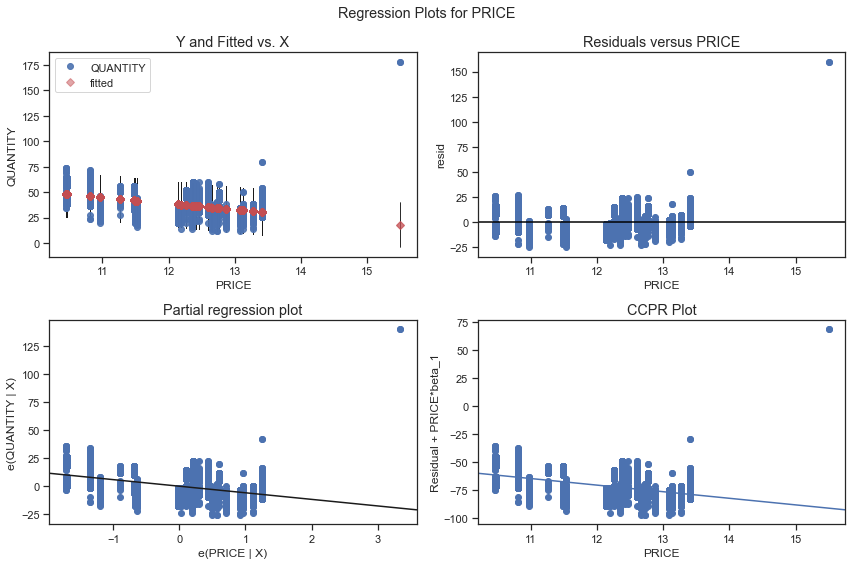

In [160]:
coke_model = ols("QUANTITY ~ PRICE", data=coke).fit()
print(coke_model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(coke_model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(coke_model, 'PRICE', fig=fig)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
6      2053              2    COFFEE      1/1/2017  12.60        30  2017   
14     2053              2    COFFEE      1/1/2018  13.41        30  2018   
22     2053              2    COFFEE      1/1/2019  12.37        44  2019   
30     2053              2    COFFEE      1/1/2020  10.81        36  2020   
38     2053              2    COFFEE     1/10/2017  12.60        58  2017   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
6     New Year           1               0                 24.8           0  
14    New Year           0               0                 30.2           1  
22    New Year           0               0                 19.4           0  
30    New Year           0               0                 37.4           1  
38  No Holiday           0               0                 24.8           0

(1351, 12)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count   1351.0         1351.0  1351.000000  1351.000000  1351.000000   
mean    2053.0            2.0    11.941377    46.205774  2018.374537   
std        0.0            0.0     0.946494    10.075081     1.072375   
min     2053.0            2.0    10.450000    20.000000  2017.000000   
25%     2053.0            2.0    10.810000    38.000000  2017.000000   
50%     2053.0            2.0    12.370000    46.000000  2018.000000   
75%     2053.0            2.0    12.600000    52.000000  2019.000000   
max     2053.0            2.0    13.410000    80.000000  2020.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  1351.000000     1351.000000          1351.000000  1351.000000  
mean      0.284974        0.204293            56.295337     0.862324  
std       0.451569        0.403333            20.228796     0.344687  
min       0.000000        0.000000            14.000000     0.000000  
25%       0.000000        0.000000            35.600000     1.000000  
50%       0.000000        0.000000            60.800000     1.000000  
75%       1.000000        0.000000            75.200000     1.000000  
max       1.000000        1.000000            87.800000     1.000000

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

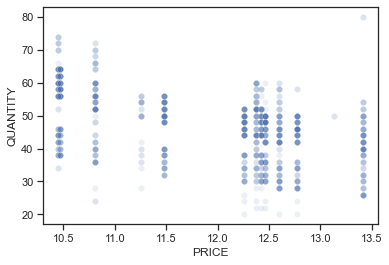

In [161]:
df = combined_data[combined_data['ITEM_NAME'] == 'COFFEE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     405.5
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           4.71e-79
Time:                        10:53:26   Log-Likelihood:                -4859.9
No. Observations:                1351   AIC:                             9724.
Df Residuals:                    1349   BIC:                             9734.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    107.3120      3.044     35.251      0.0

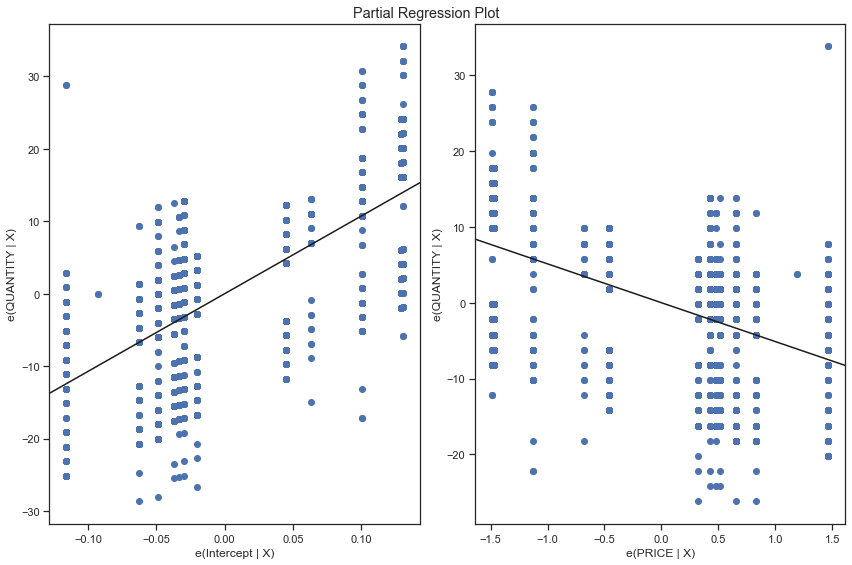

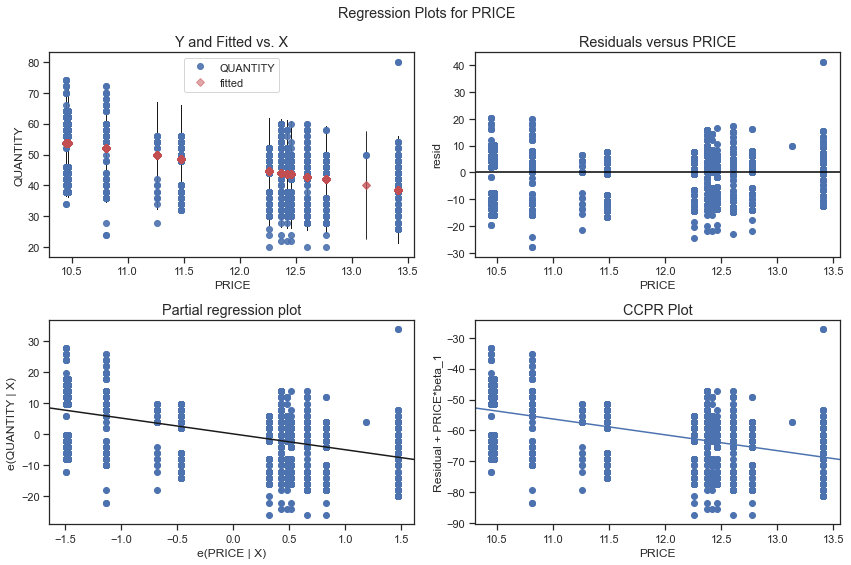

In [162]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
4      2052              2  LEMONADE      1/1/2017  12.75        18  2017   
12     2052              2  LEMONADE      1/1/2018  12.64        16  2018   
20     2052              2  LEMONADE      1/1/2019  11.96        20  2019   
28     2052              2  LEMONADE      1/1/2020  11.45        20  2020   
36     2052              2  LEMONADE     1/10/2017  12.75        28  2017   

       HOLIDAY  IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE  IS_OUTDOOR  
4     New Year           1               0                 24.8           0  
12    New Year           0               0                 30.2           1  
20    New Year           0               0                 19.4           0  
28    New Year           0               0                 37.4           1  
36  No Holiday           0               0                 24.8           0

(1351, 12)

SELL_ID  SELL_CATEGORY        PRICE     QUANTITY         YEAR  \
count   1351.0         1351.0  1351.000000  1351.000000  1351.000000   
mean    2052.0            2.0    11.986751    20.792006  2018.374537   
std        0.0            0.0     0.806112     5.215685     1.072375   
min     2052.0            2.0    10.120000     8.000000  2017.000000   
25%     2052.0            2.0    11.360000    18.000000  2017.000000   
50%     2052.0            2.0    12.260000    20.000000  2018.000000   
75%     2052.0            2.0    12.720000    24.000000  2019.000000   
max     2052.0            2.0    13.410000    80.000000  2020.000000   

        IS_WEEKEND  IS_SCHOOLBREAK  AVERAGE_TEMPERATURE   IS_OUTDOOR  
count  1351.000000     1351.000000          1351.000000  1351.000000  
mean      0.284974        0.204293            56.295337     0.862324  
std       0.451569        0.403333            20.228796     0.344687  
min       0.000000        0.000000            14.000000     0.000000  
25%       0.000000        0.000000            35.600000     1.000000  
50%       0.000000        0.000000            60.800000     1.000000  
75%       1.000000        0.000000            75.200000     1.000000  
max       1.000000        1.000000            87.800000     1.000000

<AxesSubplot:xlabel='PRICE', ylabel='QUANTITY'>

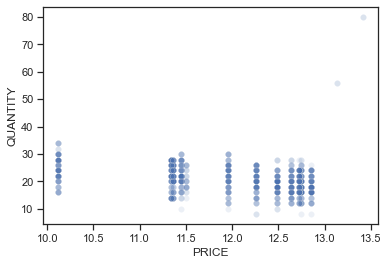

In [163]:
df = combined_data[combined_data['ITEM_NAME'] == 'LEMONADE']
df.head()
df.shape
df.describe()
sns.scatterplot(x = df.PRICE, y = df.QUANTITY , alpha = 0.1)

                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     151.5
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           4.46e-33
Time:                        10:53:28   Log-Likelihood:                -4076.0
No. Observations:                1351   AIC:                             8156.
Df Residuals:                    1349   BIC:                             8166.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.4372      2.007     22.643      0.0

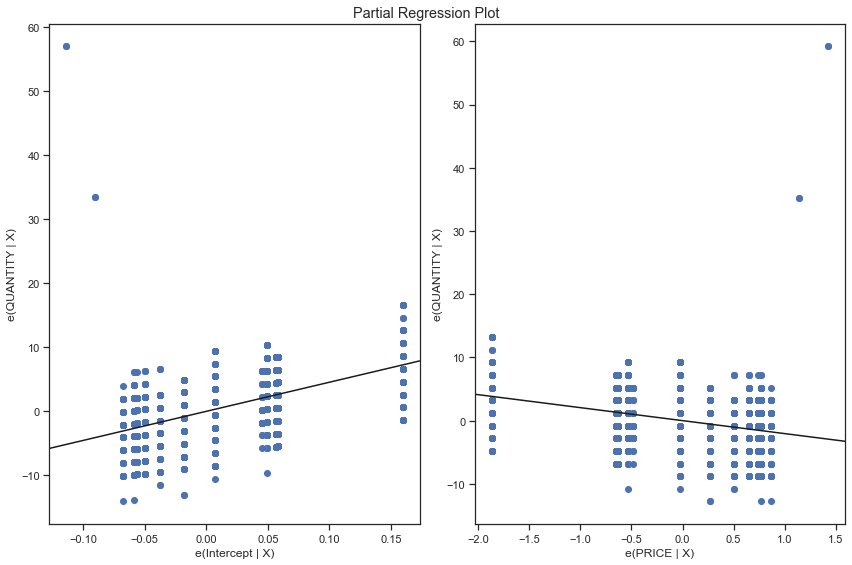

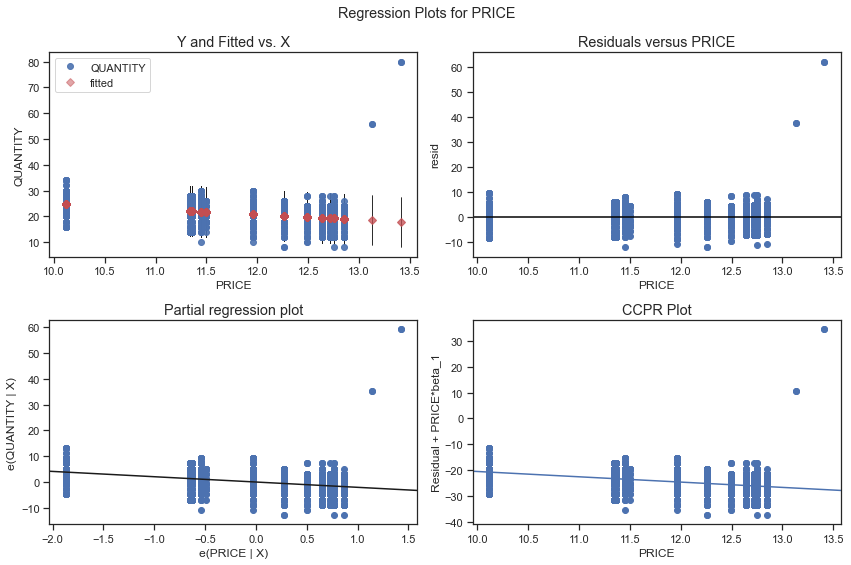

In [164]:
model = ols("QUANTITY ~ PRICE", data=df).fit()
print(model.summary())
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'PRICE', fig=fig)

In [165]:
elasticities = {}

In [166]:
def create_model_and_find_elasticity(data):
    model = ols("QUANTITY ~ PRICE", data).fit()
    price_elasticity = model.params[1]
    print("Price elasticity of the product: " + str(price_elasticity))
    print(model.summary())
    fig = plt.figure(figsize=(12,8))
    fig = sm.graphics.plot_partregress_grid(model, fig=fig)
    return price_elasticity, model

Price elasticity of the product: -7.455793484828218
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     352.6
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           1.21e-62
Time:                        10:53:31   Log-Likelihood:                -2109.2
No. Observations:                 623   AIC:                             4222.
Df Residuals:                     621   BIC:                             4231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


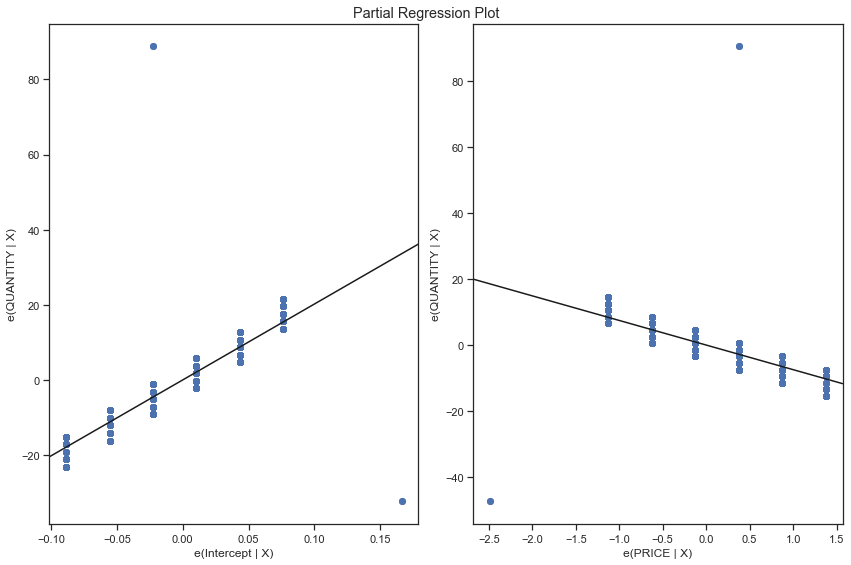

In [167]:
price_elasticity, model_burger_1070 = create_model_and_find_elasticity(burger_1070)
elasticities['burger_1070'] = price_elasticity

Price elasticity of the product: -0.6947406688026572
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.035
Date:                Fri, 22 Oct 2021   Prob (F-statistic):              0.154
Time:                        10:53:31   Log-Likelihood:                -2261.7
No. Observations:                 623   AIC:                             4527.
Df Residuals:                     621   BIC:                             4536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

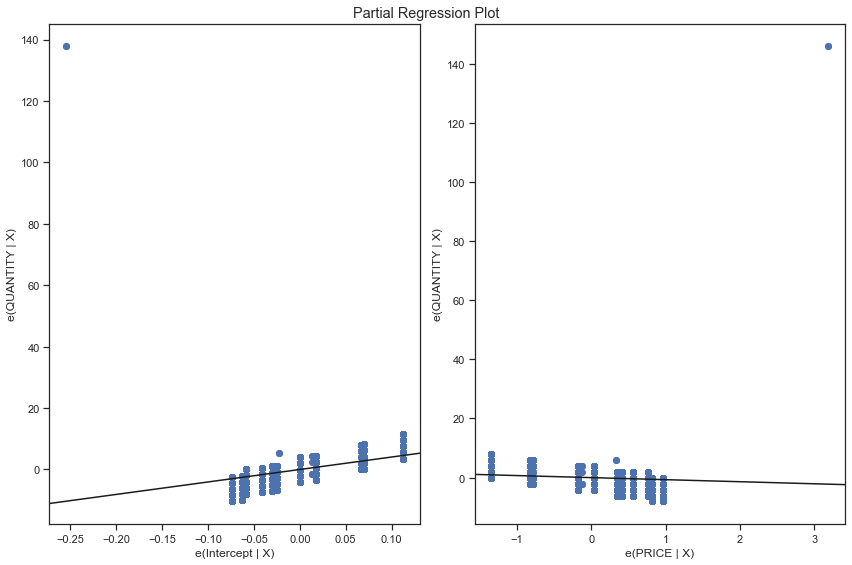

In [168]:
burger2051_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2051)]
elasticities['burger_2051'], model_burger_2051 = create_model_and_find_elasticity(burger2051_data)

Price elasticity of the product: -2.038318114706867
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     75.93
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.66e-17
Time:                        10:53:32   Log-Likelihood:                -1876.1
No. Observations:                 623   AIC:                             3756.
Df Residuals:                     621   BIC:                             3765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


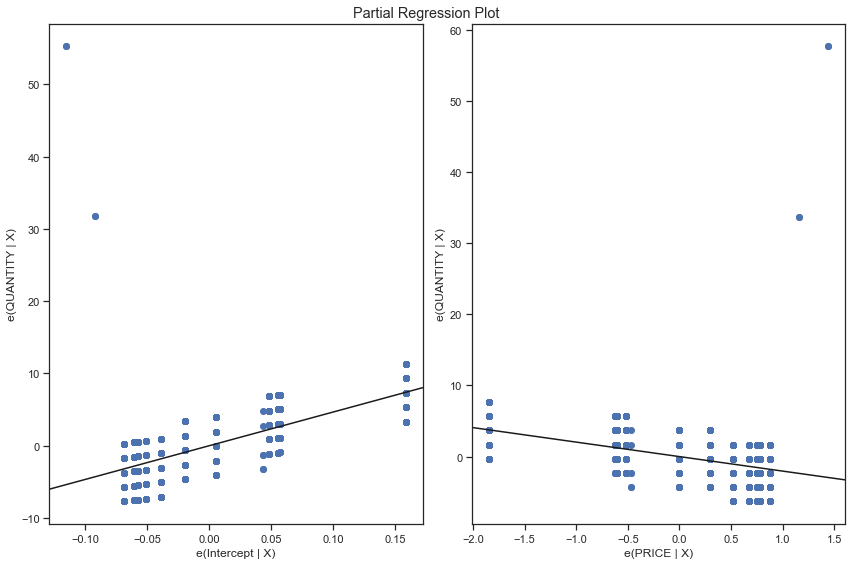

In [169]:
burger2052_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2052)]
elasticities['burger_2052'], model_burger_2052 = create_model_and_find_elasticity(burger2052_data)

Price elasticity of the product: -5.786709122173262
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1523.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          3.13e-169
Time:                        10:53:33   Log-Likelihood:                -1690.8
No. Observations:                 623   AIC:                             3386.
Df Residuals:                     621   BIC:                             3394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


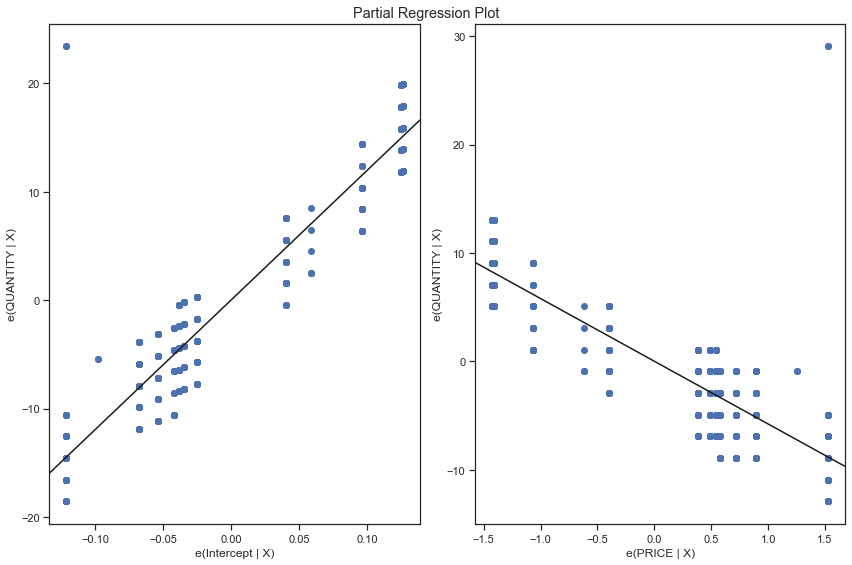

In [170]:
burger2053_data = bau2_data[(bau2_data['ITEM_NAME'] == "BURGER") & (bau2_data['SELL_ID'] == 2053)]
elasticities['burger_2053'], model_burger_2053 = create_model_and_find_elasticity(burger2053_data)

Price elasticity of the product: -6.181102815091423
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     317.0
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.36e-63
Time:                        10:53:33   Log-Likelihood:                -4763.5
No. Observations:                1246   AIC:                             9531.
Df Residuals:                    1244   BIC:                             9541.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


(-6.181102815091423,
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1b8c04ec190>)

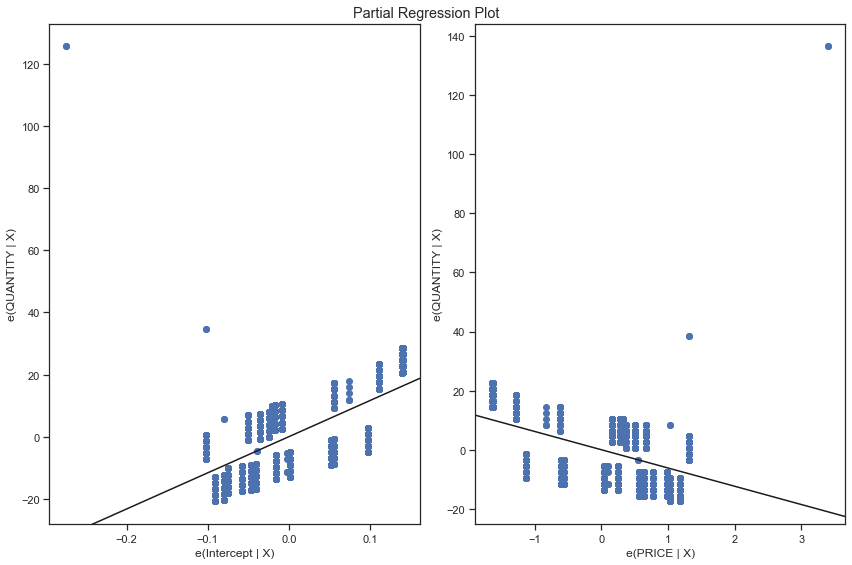

In [171]:
coke_data = bau2_data[bau2_data['ITEM_NAME'] == "COKE"]
create_model_and_find_elasticity(coke_data)

2 coke are available in combo, while 1 is available as single.. So it is likely that the bottom distribution belongs to single purchases of coke. Let's verfy this

In [172]:
coke_data

SELL_ID  SELL_CATEGORY ITEM_NAME CALENDAR_DATE  PRICE  QUANTITY  YEAR  \
178       2051              2      COKE     1/14/2019  13.27        24  2019   
183       2053              2      COKE     1/14/2019  12.37        52  2019   
218       2051              2      COKE     1/15/2020  11.53        36  2020   
223       2053              2      COKE     1/15/2020  10.81        56  2020   
250       2051              2      COKE     1/16/2020  11.53        32  2020   
255       2053              2      COKE     1/16/2020  10.81        60  2020   
378       2051              2      COKE      1/2/2020  11.53        30  2020   
383       2053              2      COKE      1/2/2020  10.81        60  2020   
610       2051              2      COKE     1/27/2017  12.73        28  2017   
615       2053              2      COKE     1/27/2017  12.60        46  2017   
770       2051              2      COKE     1/31/2017  12.73        30  2017   
775       2053              2      COKE     1/31/2017  12.60        42  2017   
802       2051              2      COKE      1/4/2017  12.73        26  2017   
807       2053              2      COKE      1/4/2017  12.60        42  2017   
858       2051              2      COKE      1/5/2020  11.53        36  2020   
863       2053              2      COKE      1/5/2020  10.81        54  2020   
890       2051              2      COKE      1/6/2020  11.53        30  2020   
895       2053              2      COKE      1/6/2020  10.81        52  2020   
922       2051              2      COKE      1/7/2020  11.53        30  2020   
927       2053              2      COKE      1/7/2020  10.81        52  2020   
1018      2051              2      COKE    10/10/2017  12.35        36  2017   
1023      2053              2      COKE    10/10/2017  12.42        46  2017   
1026      2051              2      COKE    10/10/2018  10.97        36  2018   
1031      2053              2      COKE    10/10/2018  10.45        56  2018   
1034      2051              2      COKE    10/10/2019  12.87        34  2019   
1039      2053              2      COKE    10/10/2019  12.77        46  2019   
1042      2051              2      COKE    10/11/2017  12.35        30  2017   
1047      2053              2      COKE    10/11/2017  12.42        48  2017   
1050      2051              2      COKE    10/11/2018  10.97        34  2018   
1055      2053              2      COKE    10/11/2018  10.45        58  2018   
1066      2051              2      COKE    10/12/2017  12.35        30  2017   
1071      2053              2      COKE    10/12/2017  12.42        48  2017   
1106      2051              2      COKE    10/13/2019  12.87        30  2019   
1111      2053              2      COKE    10/13/2019  12.77        44  2019   
1122      2051              2      COKE    10/14/2018  10.97        32  2018   
1127      2053              2      COKE    10/14/2018  10.45        56  2018   
1130      2051              2      COKE    10/14/2019  12.87        32  2019   
1135      2053              2      COKE    10/14/2019  12.77        42  2019   
1138      2051              2      COKE    10/15/2017  12.35        28  2017   
1143      2053              2      COKE    10/15/2017  12.42        50  2017   
1146      2051              2      COKE    10/15/2018  10.97        36  2018   
1151      2053              2      COKE    10/15/2018  10.45        60  2018   
1154      2051              2      COKE    10/15/2019  12.87        30  2019   
1159      2053              2      COKE    10/15/2019  12.77        44  2019   
1162      2051              2      COKE    10/16/2017  12.35        28  2017   
1167      2053              2      COKE    10/16/2017  12.42        48  2017   
1170      2051              2      COKE    10/16/2018  10.97        38  2018   
1175      2053              2      COKE    10/16/2018  10.45        58  2018   
1178      2051              2      COKE    10/16/2019  12.87        26  2019   
1183   

Price elasticity of the product: -5.786709122173262
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1523.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          3.13e-169
Time:                        10:53:39   Log-Likelihood:                -1690.8
No. Observations:                 623   AIC:                             3386.
Df Residuals:                     621   BIC:                             3394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


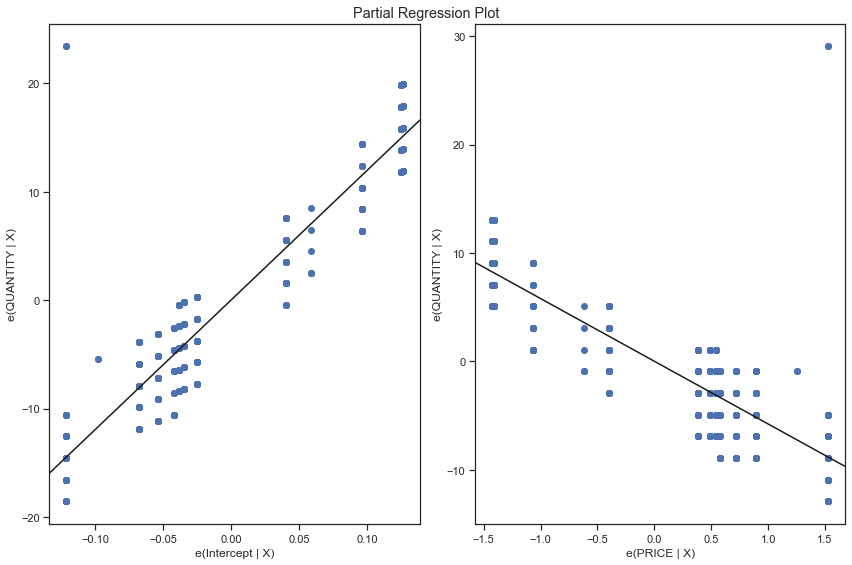

In [173]:
coke_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coke_2053'], model_coke_2053 = create_model_and_find_elasticity(coke_data_2053)

Price elasticity of the product: -0.6947406688026572
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.035
Date:                Fri, 22 Oct 2021   Prob (F-statistic):              0.154
Time:                        10:53:40   Log-Likelihood:                -2261.7
No. Observations:                 623   AIC:                             4527.
Df Residuals:                     621   BIC:                             4536.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

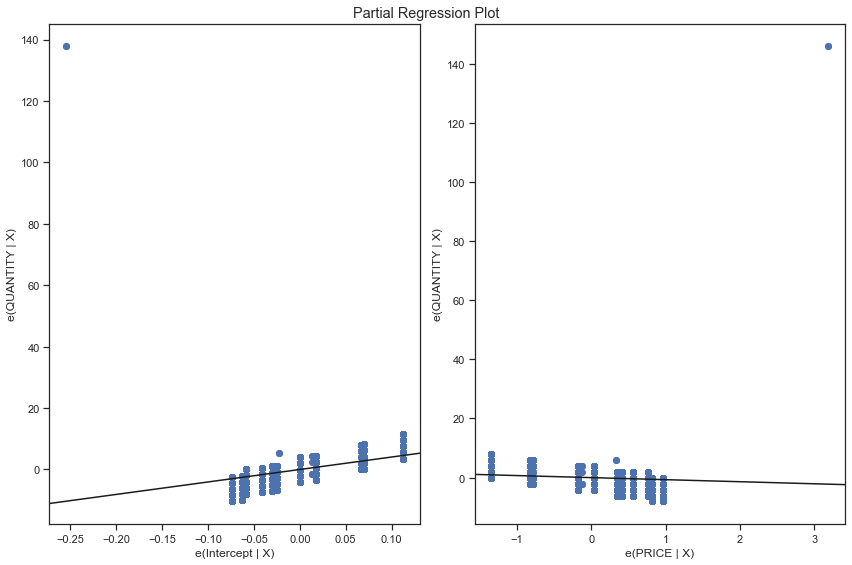

In [174]:
coke_data_2051 = bau2_data[(bau2_data['ITEM_NAME'] == "COKE") & (bau2_data['SELL_ID'] == 2051)]
elasticities['coke_2051'], model_coke_2051 = create_model_and_find_elasticity(coke_data_2051)


Price elasticity of the product: -2.038318114706867
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     75.93
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           2.66e-17
Time:                        10:53:41   Log-Likelihood:                -1876.1
No. Observations:                 623   AIC:                             3756.
Df Residuals:                     621   BIC:                             3765.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


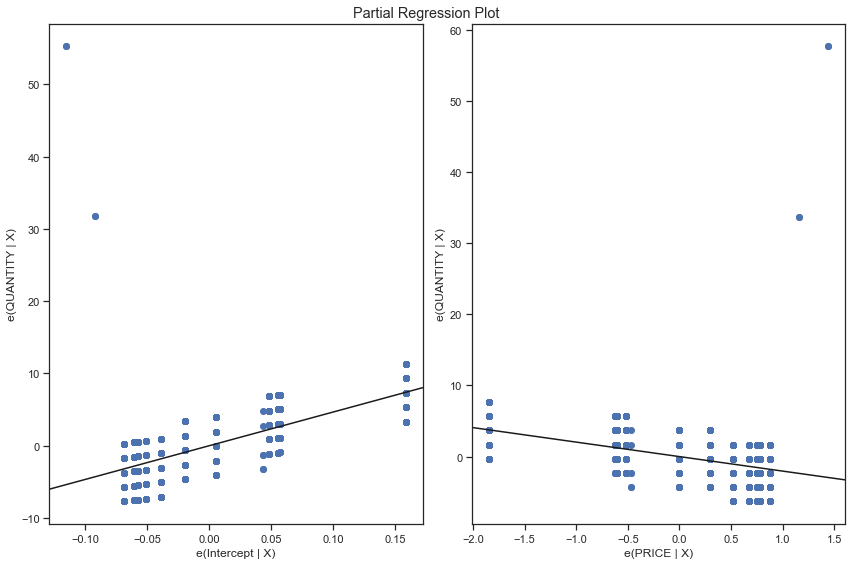

In [175]:
lemonade_data_2052 = bau2_data[(bau2_data['ITEM_NAME'] == "LEMONADE") & (bau2_data['SELL_ID'] == 2052)]
elasticities['lemonade_2052'], model_lemonade_2052 = create_model_and_find_elasticity(lemonade_data_2052)

Price elasticity of the product: -5.786709122173262
                            OLS Regression Results                            
Dep. Variable:               QUANTITY   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1523.
Date:                Fri, 22 Oct 2021   Prob (F-statistic):          3.13e-169
Time:                        10:53:43   Log-Likelihood:                -1690.8
No. Observations:                 623   AIC:                             3386.
Df Residuals:                     621   BIC:                             3394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------


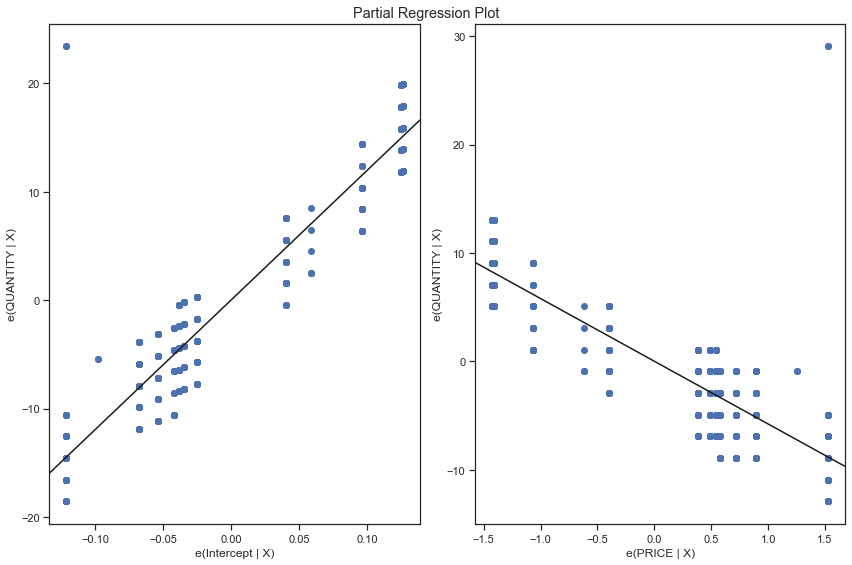

In [177]:
coffee_data_2053 = bau2_data[(bau2_data['ITEM_NAME'] == "COFFEE") & (bau2_data['SELL_ID'] == 2053)]
elasticities['coffee_2053'], model_coffee_2053 = create_model_and_find_elasticity(coffee_data_2053)

## List in a table the items and their price elasticities

In [114]:
elasticities

{'burger_1070': -7.455793484828218,
 'burger_2051': -0.6947406688026572,
 'burger_2052': -2.038318114706867,
 'burger_2053': -5.786709122173262,
 'coke_2053': -5.786709122173262,
 'coke_2051': -0.6947406688026572,
 'lemonade_2052': -2.038318114706867,
 'coffee_2053': -5.786709122173262}

# Find optimal price for maximum profit

In [115]:
coke_data = coke_data_2053

In [116]:
coke_data.PRICE.min()

10.45

In [117]:
coke_data.PRICE.max()

13.41

Let's take 9 as the buying price of coke. We now want to be able to set the price of coke to get the maximum profit. PRICE is the selling price

In [118]:
buying_price_coke = 9

$$coke data.PROFIT = (coke data.PRICE - buying price coke) * coke data.QUANTITY$$
Let's see the profit for various price points:

In [119]:
start_price = 9.5
end_price = 20

In [120]:
test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])

In [121]:
test['PRICE'] = np.arange(start_price, end_price,0.01)

In [122]:
test['QUANTITY'] = model_coke_2051.predict(test['PRICE'])

In [123]:
test

PRICE   QUANTITY
0      9.50  34.032723
1      9.51  34.025776
2      9.52  34.018829
3      9.53  34.011881
4      9.54  34.004934
5      9.55  33.997986
6      9.56  33.991039
7      9.57  33.984092
8      9.58  33.977144
9      9.59  33.970197
10     9.60  33.963249
11     9.61  33.956302
12     9.62  33.949355
13     9.63  33.942407
14     9.64  33.935460
15     9.65  33.928512
16     9.66  33.921565
17     9.67  33.914618
18     9.68  33.907670
19     9.69  33.900723
20     9.70  33.893775
21     9.71  33.886828
22     9.72  33.879880
23     9.73  33.872933
24     9.74  33.865986
25     9.75  33.859038
26     9.76  33.852091
27     9.77  33.845143
28     9.78  33.838196
29     9.79  33.831249
30     9.80  33.824301
31     9.81  33.817354
32     9.82  33.810406
33     9.83  33.803459
34     9.84  33.796512
35     9.85  33.789564
36     9.86  33.782617
37     9.87  33.775669
38     9.88  33.768722
39     9.89  33.761775
40     9.90  33.754827
41     9.91  33.747880
42     9.92  33.740932
43     9.93  33.733985
44     9.94  33.727038
45     9.95  33.720090
46     9.96  33.713143
47     9.97  33.706195
48     9.98  33.699248
49     9.99  33.692301
50    10.00  33.685353
51    10.01  33.678406
52    10.02  33.671458
53    10.03  33.664511
54    10.04  33.657563
55    10.05  33.650616
56    10.06  33.643669
57    10.07  33.636721
58    10.08  33.629774
59    10.09  33.622826
60    10.10  33.615879
61    10.11  33.608932
62    10.12  33.601984
63    10.13  33.595037
64    10.14  33.588089
65    10.15  33.581142
66    10.16  33.574195
67    10.17  33.567247
68    10.18  33.560300
69    10.19  33.553352
70    10.20  33.546405
71    10.21  33.539458
72    10.22  33.532510
73    10.23  33.525563
74    10.24  33.518615
75    10.25  33.511668
76    10.26  33.504721
77    10.27  33.497773
78    10.28  33.490826
79    10.29  33.483878
80    10.30  33.476931
81    10.31  33.469983
82    10.32  33.463036
83    10.33  33.456089
84    10.34  33.449141
85    10.35  33.442194
86    10.36  33.435246
87    10.37  33.428299
88    10.38  33.421352
89    10.39  33.414404
90    10.40  33.407457
91    10.41  33.400509
92    10.42  33.393562
93    10.43  33.386615
94    10.44  33.379667
95    10.45  33.372720
96    10.46  33.365772
97    10.47  33.358825
98    10.48  33.351878
99    10.49  33.344930
100   10.50  33.337983
101   10.51  33.331035
102   10.52  33.324088
103   10.53  33.317141
104   10.54  33.310193
105   10.55  33.303246
106   10.56  33.296298
107   10.57  33.289351
108   10.58  33.282404
109   10.59  33.275456
110   10.60  33.268509
111   10.61  33.261561
112   10.62  33.254614
113   10.63  33.247666
114   10.64  33.240719
115   10.65  33.233772
116   10.66  33.226824
117   10.67  33.219877
118   10.68  33.212929
119   10.69  33.205982
120   10.70  33.199035
121   10.71  33.192087
122   10.72  33.185140
123   10.73  33.178192
124   10.74  33.171245
125   10.75  33.164298
126   10.76  33.157350
127   10.77  33.150403
128   10.78  33.143455
129   10.79  33.136508
130   10.80  33.129561
131   10.81  33.122613
132   10.82  33.115666
133   10.83  33.108718
134   10.84  33.101771
135   10.85  33.094824
136   10.86  33.087876
137   10.87  33.080929
138   10.88  33.073981
139   10.89  33.067034
140   10.90  33.060086
141   10.91  33.053139
142   10.92  33.046192
143   10.93  33.039244
144   10.94  33.032297
145   10.95  33.025349
146   10.96  33.018402
147   10.97  33.011455
148   10.98  33.004507
149   10.99  32.997560
150   11.00  32.990612
151   11.01  32.983665
152   11.02  32.976718
153   11.03  32.969770
154   11.04  32.962823
155   11.05  32.955875
156   11.06  32.948928
157   11.07  32.941981
158   11.08  32.935033
159   11.09  32.928086
160   11.10  32.921138
161   11.11  32.914191
162   11.12  32.907244
163   11.13  32.900296
164   11.14  32.893349
165   11.15  32.886401
166   11.16  32.879454
167   11.17  32.872507
168   11.18  32.865559
169   11.19  32.858612
170   11.20  32.851664
171   11.21  32.844717
172   11.22  32.837769
173 

In [124]:
test['PROFIT'] = (test["PRICE"] - buying_price_coke) * test["QUANTITY"]

In [125]:
test

PRICE   QUANTITY      PROFIT
0      9.50  34.032723   17.016362
1      9.51  34.025776   17.353146
2      9.52  34.018829   17.689791
3      9.53  34.011881   18.026297
4      9.54  34.004934   18.362664
5      9.55  33.997986   18.698893
6      9.56  33.991039   19.034982
7      9.57  33.984092   19.370932
8      9.58  33.977144   19.706744
9      9.59  33.970197   20.042416
10     9.60  33.963249   20.377950
11     9.61  33.956302   20.713344
12     9.62  33.949355   21.048600
13     9.63  33.942407   21.383717
14     9.64  33.935460   21.718694
15     9.65  33.928512   22.053533
16     9.66  33.921565   22.388233
17     9.67  33.914618   22.722794
18     9.68  33.907670   23.057216
19     9.69  33.900723   23.391499
20     9.70  33.893775   23.725643
21     9.71  33.886828   24.059648
22     9.72  33.879880   24.393514
23     9.73  33.872933   24.727241
24     9.74  33.865986   25.060829
25     9.75  33.859038   25.394279
26     9.76  33.852091   25.727589
27     9.77  33.845143   26.060760
28     9.78  33.838196   26.393793
29     9.79  33.831249   26.726686
30     9.80  33.824301   27.059441
31     9.81  33.817354   27.392057
32     9.82  33.810406   27.724533
33     9.83  33.803459   28.056871
34     9.84  33.796512   28.389070
35     9.85  33.789564   28.721130
36     9.86  33.782617   29.053050
37     9.87  33.775669   29.384832
38     9.88  33.768722   29.716475
39     9.89  33.761775   30.047979
40     9.90  33.754827   30.379344
41     9.91  33.747880   30.710571
42     9.92  33.740932   31.041658
43     9.93  33.733985   31.372606
44     9.94  33.727038   31.703415
45     9.95  33.720090   32.034086
46     9.96  33.713143   32.364617
47     9.97  33.706195   32.695009
48     9.98  33.699248   33.025263
49     9.99  33.692301   33.355378
50    10.00  33.685353   33.685353
51    10.01  33.678406   34.015190
52    10.02  33.671458   34.344887
53    10.03  33.664511   34.674446
54    10.04  33.657563   35.003866
55    10.05  33.650616   35.333147
56    10.06  33.643669   35.662289
57    10.07  33.636721   35.991292
58    10.08  33.629774   36.320156
59    10.09  33.622826   36.648881
60    10.10  33.615879   36.977467
61    10.11  33.608932   37.305914
62    10.12  33.601984   37.634222
63    10.13  33.595037   37.962392
64    10.14  33.588089   38.290422
65    10.15  33.581142   38.618313
66    10.16  33.574195   38.946066
67    10.17  33.567247   39.273679
68    10.18  33.560300   39.601154
69    10.19  33.553352   39.928489
70    10.20  33.546405   40.255686
71    10.21  33.539458   40.582744
72    10.22  33.532510   40.909662
73    10.23  33.525563   41.236442
74    10.24  33.518615   41.563083
75    10.25  33.511668   41.889585
76    10.26  33.504721   42.215948
77    10.27  33.497773   42.542172
78    10.28  33.490826   42.868257
79    10.29  33.483878   43.194203
80    10.30  33.476931   43.520010
81    10.31  33.469983   43.845678
82    10.32  33.463036   44.171208
83    10.33  33.456089   44.496598
84    10.34  33.449141   44.821849
85    10.35  33.442194   45.146962
86    10.36  33.435246   45.471935
87    10.37  33.428299   45.796770
88    10.38  33.421352   46.121465
89    10.39  33.414404   46.446022
90    10.40  33.407457   46.770440
91    10.41  33.400509   47.094718
92    10.42  33.393562   47.418858
93    10.43  33.386615   47.742859
94    10.44  33.379667   48.066721
95    10.45  33.372720   48.390444
96    10.46  33.365772   48.714028
97    10.47  33.358825   49.037473
98    10.48  33.351878   49.360779
99    10.49  33.344930   49.683946
100   10.50  33.337983   50.006974
101   10.51  33.331035   50.329863
102   10.52  33.324088   50.652614
103   10.53  33.317141   50.975225
104   10.54  33.310193   51.297697
105   10.55  33.303246   51.620031
106   10.56  33.296298   51.942225
107   10.57  33.289351   52.264281
108   10.58  33.282404   52.586198
109   10.59  33.275456   52.907975
110   10.60  33.268509   53.229614
111   10.61  33.261561   53.551114
112   10.62  33.254614   53.872474
113   10.63  33.

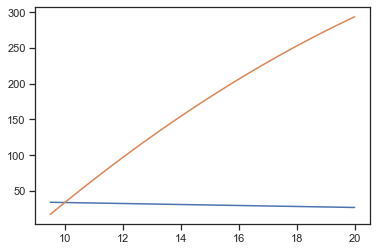

In [126]:
plt.plot(test['PRICE'],test['QUANTITY'])
plt.plot(test['PRICE'],test['PROFIT'])
plt.show()

Let's find the exact price at which maximum profit is gained:

In [127]:
ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]

In [128]:
test.loc[[ind]]

PRICE   QUANTITY      PROFIT
1049  19.99  26.744894  293.926383

In [129]:
def find_optimal_price(data, model, buying_price):
    start_price = data.PRICE.min() - 1
    end_price = data.PRICE.min() + 10
    test = pd.DataFrame(columns = ["PRICE", "QUANTITY"])
    test['PRICE'] = np.arange(start_price, end_price,0.01)
    test['QUANTITY'] = model.predict(test['PRICE'])
    test['PROFIT'] = (test["PRICE"] - buying_price) * test["QUANTITY"]
    plt.plot(test['PRICE'],test['QUANTITY'])
    plt.plot(test['PRICE'],test['PROFIT'])
    plt.show()
    ind = np.where(test['PROFIT'] == test['PROFIT'].max())[0][0]
    values_at_max_profit = test.iloc[[ind]]
    return values_at_max_profit
    

## Calculate the optimal price for all and list in table

In [130]:
optimal_price = {}
buying_price = 9

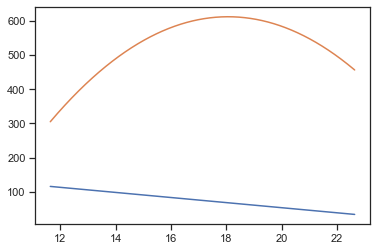

In [131]:
optimal_price['burger_1070'] = find_optimal_price(burger_1070, model_burger_1070, buying_price)

In [132]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 642  18.06  67.541907  611.929679}

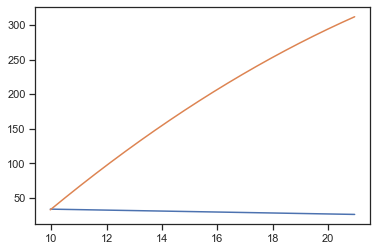

In [133]:
optimal_price['burger_2051'] = find_optimal_price(burger2051_data, model_burger_2051, buying_price)

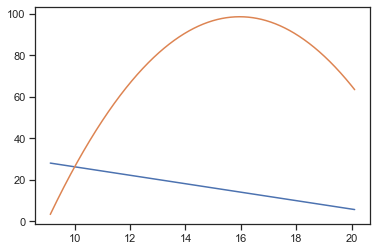

In [134]:
optimal_price['burger_2052'] = find_optimal_price(burger2052_data, model_burger_2052, buying_price)

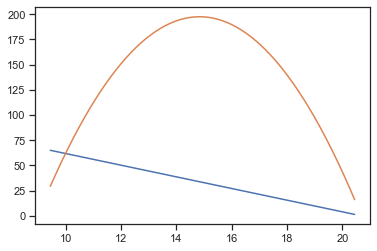

In [135]:
optimal_price['burger_2053'] = find_optimal_price(burger2053_data, model_burger_2053, buying_price)

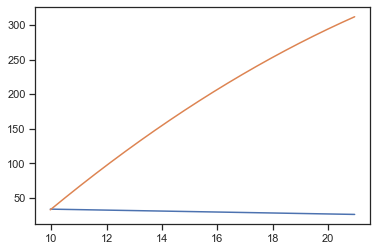

In [136]:
optimal_price['coke_2051'] = find_optimal_price(coke_data_2051, model_coke_2051, buying_price)

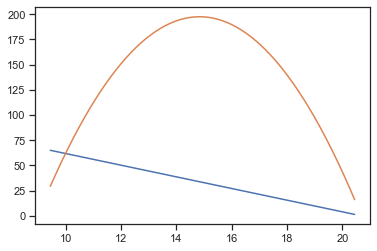

In [137]:
optimal_price['coke_2053'] = find_optimal_price(coke_data_2053, model_coke_2053, buying_price)

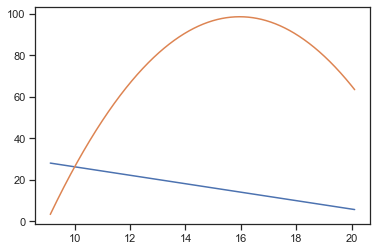

In [138]:
optimal_price['lemonade_2052'] = find_optimal_price(lemonade_data_2052, model_lemonade_2052, buying_price)

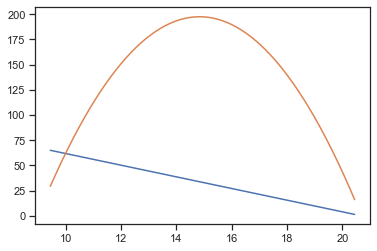

In [139]:
optimal_price['coffee_2053'] = find_optimal_price(coffee_data_2053, model_coffee_2053, buying_price)

In [179]:
optimal_price

{'burger_1070':      PRICE   QUANTITY      PROFIT
 642  18.06  67.541907  611.929679,
 'burger_2051':       PRICE   QUANTITY      PROFIT
 1099  20.96  26.070995  311.809105,
 'burger_2052':      PRICE   QUANTITY     PROFIT
 684  15.96  14.175235  98.659638,
 'burger_2053':      PRICE   QUANTITY      PROFIT
 539  14.84  33.810186  197.451487,
 'coke_2051':       PRICE   QUANTITY      PROFIT
 1099  20.96  26.070995  311.809105,
 'coke_2053':      PRICE   QUANTITY      PROFIT
 539  14.84  33.810186  197.451487,
 'lemonade_2052':      PRICE   QUANTITY     PROFIT
 684  15.96  14.175235  98.659638,
 'coffee_2053':      PRICE   QUANTITY      PROFIT
 539  14.84  33.810186  197.451487}

In [180]:
coke_data_2051.PRICE.describe()

count    623.000000
mean      12.310353
std        0.752657
min       10.970000
25%       11.530000
50%       12.350000
75%       12.870000
max       15.500000
Name: PRICE, dtype: float64